
#  <span style="color:#9400D3;text-decoration:overline;font-weight:bold"><u> AIML Module Project - SUPERVISED LEARNING</u></span>



### <span style="color:#9400D3">Importing Required Python Modules and Libraries
  Here we are importing all the Libraries and Modules that are needed for whole project in a single cell.

In [1]:
# Libraries for Basic Process 
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Pre-setting Plot Style
font={'size':15}
plt.rc('font', **font)
plt.rc('xtick',labelsize=12)    
plt.rc('ytick',labelsize=12)
sns.set_style({'xtick.bottom':True,'ytick.left':True,'text.color':'#9400D3',
               'axes.labelcolor': 'blue','patch.edgecolor': 'black'})

# sklearn Modules
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Supporting Modules
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE

# Module to Suppress Warnings
from warnings import filterwarnings
filterwarnings('ignore')

***
# <span style="color:#9400D3">Part ONE - **Project Based**                          
***

**DOMAIN:** Healthcare
<br><br>
**CONTEXT:** Medical research university X is undergoing a deep research on patients with certain conditions.
University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by
the client by providing different datasets to the AI team for developing a AIML model which can predict the
condition of the patient depending on the received test results.
<br><br>
**DATA DESCRIPTION:** The data consists of biomechanics features of the patients according to their current
conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and
orientation of the condition to their body part.
1. P_incidence
2. P_tilt
3. L_angle
4. S_slope
5. P_radius
6. S_degree
7. Class
<br><br>
**PROJECT OBJECTIVE:** Demonstrate the ability to fetch, process and leverage data to generate useful predictions
by training Supervised Learning algorithms.

**Steps and tasks:**
1. Import and warehouse data:
 * Import all the given datasets and explore shape and size of each.
 * Merge all datasets onto one and explore final shape and size.


2. Data cleansing:
 * Explore and if required correct the datatypes of each attribute
 * Explore for null values in the attributes and if required drop or impute values.


3. Data analysis & visualisation:
 * Perform detailed statistical analysis on the data.
 * Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.


4. Data pre-processing:
 * Segregate predictors vs target attributes
 * Perform normalisation or scaling if required.
 * Check for target balancing. Add your comments.
 * Perform train-test split.


5. Model training, testing and tuning:
 * Design and train a KNN classifier.
 * Display the classification accuracies for train and test data.
 * Display and explain the classification report in detail.
 * Automate the task of finding best values of K for KNN.
 * Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model.


6. Conclusion and improvisation:
 * Write your conclusion on the results.
 * Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the research team to perform a better data analysis in future.

***
## <span style="color:#9400D3">1. Import and Warehouse Data:

### <span style="color:#9400D3"> * Import all the given Datasets and Explore Shape and Size of each.
   * All Files are imported that are specified for Part 1 of project.
   * If any file fails to load, then a quick check is needed for file names.
   * Here we have 3 files, make sure that original file names match the names which are coded below.
   * All the files are in CSV format, if format of original file changes then error in loading files will appear.

In [2]:
# Loading the files and creating dataframes
Normal = pd.read_csv('Normal.csv')
Type_H = pd.read_csv('Type_H.csv')
Type_S = pd.read_csv('Type_S.csv')

# Getting Shape and Size of each data
N = Normal.shape
H = Type_H.shape
S = Type_S.shape

# Displaying Normal Dataset
print('\033[1m1. Normal Dataset consist:-\033[0m\n Number of Rows    =',N[0],'\n Number of Columns =',N[1])
display(Normal.head())
print('_________________________________________________________________________________')

# Displaying Type_H Dataset
print('\033[1m\n2. Type_H Dataset consist:-\033[0m\n Number of Rows    =',H[0],'\n Number of Columns =',H[1])
display(Type_H.head())
print('_________________________________________________________________________________')

# Displaying Type_S Dataset
print('\033[1m\n3. Type_S Dataset consist:-\033[0m\n Number of Rows    =',S[0],'\n Number of Columns =',S[1])
display(Type_S.head())

1. Normal Dataset consist:-
 Number of Rows    = 100 
 Number of Columns = 7


P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal

_________________________________________________________________________________

2. Type_H Dataset consist:-
 Number of Rows    = 60 
 Number of Columns = 7


P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    63.027818  22.552586  39.609117  40.475232   98.672917  -0.254400  Type_H
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259  Type_H
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317  Type_H
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523  Type_H
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501  Type_H

_________________________________________________________________________________

3. Type_S Dataset consist:-
 Number of Rows    = 150 
 Number of Columns = 7


P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    74.377678  32.053104  78.772013  42.324573  143.560690  56.125906  Type_S
1    89.680567  32.704435  83.130732  56.976132  129.955476  92.027277  Type_S
2    44.529051   9.433234  52.000000  35.095817  134.711772  29.106575  Type_S
3    77.690577  21.380645  64.429442  56.309932  114.818751  26.931841  Type_S
4    76.147212  21.936186  82.961502  54.211027  123.932010  10.431972  Type_S

***
**Key Observations:-**
* All the three datasets has 7 Columns.
* Normal dataset has 100 rows and its Class attribute is Normal.
* Type_ H dataset has 60 rows and its Class attribute is Type_H.
* Type_S dataset has 150 rows and its Class attribute is Type_S.
***

### <span style="color:#9400D3"> * Merge all Datasets onto One and Explore Final Shape and Size.
  * Here we are simply appending the datasets to create single dataset.

In [3]:
# Merging all three datasets into single dataset
biodata = Normal.append([Type_H,Type_S])

# Getting Shape and Size of final dataset
B = biodata.shape

# Displaying Final Dataset
print('\033[1mFinal Dataset consist:-\033[0m\n Number of Rows    =',B[0],'\n Number of Columns =',B[1])
display(biodata.head(10))

Final Dataset consist:-
 Number of Rows    = 310 
 Number of Columns = 7


P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal
5    30.741938  13.354966  35.903526  17.386972  142.410107 -2.005373  Normal
6    50.913101   6.677000  30.896522  44.236102  118.151531 -1.057986  Normal
7    38.126589   6.557617  50.445075  31.568971  132.114805  6.338199  Normal
8    51.624672  15.969344  35.000000  35.655328  129.385308  1.009228   Nrmal
9    64.311867  26.328369  50.958964  37.983498  106.177751  3.118221   Nrmal

***
**Key Observations:-**
* All three datasets are merged to a single dataframe i.e **"biodata"**.
* Final Dataset has 310 rows with 7 columns.
* In attribute Class we have merged 3 unique Classes i.e 'Normal','Type_H' and 'Type_S'. Hence it becomes Categorical Attribute.
* But there is some abnormal/error values in Class such "Nrmal" is observed. 

***
## <span style="color:#9400D3">2. Data Cleansing:

### <span style="color:#9400D3"> * Explore and If Required Correct the Datatypes of Each Attribute.

In [4]:
# Exploring dataset
print('\n\033[1mData Types of Each Attribute:-')
display(biodata.dtypes.to_frame('Data Type'))


Data Types of Each Attribute:-


Data Type
P_incidence   float64
P_tilt        float64
L_angle       float64
S_slope       float64
P_radius      float64
S_Degree      float64
Class          object

***
**Key Observations:-**
* 6 Attributes of dataset has Numerical datatype and One Attribute i.e 'Class' is Object datatype
* Datatypes of each Attribute are Correct. No changes needed.
***

### <span style="color:#9400D3"> * Explore for Null Values in the Attributes and If Required Drop or Impute values.

In [5]:
# Checking for Null Values
print('\n\033[1mNull Values in the Attributes:-')
display(biodata.isnull().sum().to_frame('Null Values'))


Null Values in the Attributes:-


Null Values
P_incidence            0
P_tilt                 0
L_angle                0
S_slope                0
P_radius               0
S_Degree               0
Class                  0

**Comments:-**
* The Attributes has no Null values.
* Since categorical attribute 'Class' has datatype as object, we need to check its uniqueness

In [6]:
# Checking unique values of Class Attribute
print('\n\033[1mTotal Unique Values of Attribute Class =',biodata.Class.nunique())
print('\n\033[1mUnique Values are:-')
display(biodata.groupby('Class').size().to_frame('Total Values'))


Total Unique Values of Attribute Class = 6

Unique Values are:-


Total Values
Class               
Normal            73
Nrmal             27
Type_H            37
Type_S           133
tp_s              17
type_h            23

**Comments:-**
* Class attribute has 6 unique values instead of 3 (Normal,Type_H and Type_S).
* Hence we need to change the other 3 unique values to their respective class.

In [7]:
# Replacing incorrect unique values with correct values
biodata['Class']=biodata['Class'].replace({'Nrmal':'Normal','type_h':'Type_H','tp_s':'Type_S'},regex=True)

# Checking unique values after replacement
print('\n\033[1mTotal Unique Values After Replacement =',biodata.Class.nunique())
print('\n\033[1mUnique Values are:-')
display(biodata.groupby('Class').size().to_frame('Total Values'))


Total Unique Values After Replacement = 3

Unique Values are:-


Total Values
Class               
Normal           100
Type_H            60
Type_S           150

***
**Key Observations:-**
* There are no Null values in dataset, but we have observed different unique/error values in Class attribute.
* Those error values are fixed by replacing origial values.

***
## <span style="color:#9400D3">3. Data Analysis & Visualisation:

### <span style="color:#9400D3"> * Perform Detailed Statistical Analysis on the Data.
  * Statistical Analysis used to describe, show or summarize data from a sample in a meaningful way.
   
#### Brief Summary of Data

In [8]:
# Describing the data interms of count, mean, standard deviation, and 5 point summary
print('\n\033[1mBrief Summary of Dataset:-')
display(biodata.describe())


Brief Summary of Dataset:-


P_incidence      P_tilt     L_angle     S_slope    P_radius    S_Degree
count   310.000000  310.000000  310.000000  310.000000  310.000000  310.000000
mean     60.496653   17.542822   51.930930   42.953831  117.920655   26.296694
std      17.236520   10.008330   18.554064   13.423102   13.317377   37.559027
min      26.147921   -6.554948   14.000000   13.366931   70.082575  -11.058179
25%      46.430294   10.667069   37.000000   33.347122  110.709196    1.603727
50%      58.691038   16.357689   49.562398   42.404912  118.268178   11.767934
75%      72.877696   22.120395   63.000000   52.695888  125.467674   41.287352
max     129.834041   49.431864  125.742385  121.429566  163.071041  418.543082

**Summary Based on Dependent Variable**

In [9]:
# Summary Based on Dependent Variable Class
print('\n\033[1mSummary Based on Dependent Variable:-')
display(biodata.groupby('Class').describe().T)


Summary Based on Dependent Variable:-


Class                  Normal      Type_H      Type_S
P_incidence count  100.000000   60.000000  150.000000
            mean    51.685244   47.638407   71.514224
            std     12.368161   10.697131   15.109337
            min     30.741938   26.147921   37.903910
            25%     42.817849   41.018099   60.658136
            50%     50.123115   46.416169   72.149306
            75%     61.470097   53.922329   81.075893
            max     89.834676   74.433593  129.834041
P_tilt      count  100.000000   60.000000  150.000000
            mean    12.821414   17.398795   20.748038
            std      6.778503    7.016708   11.506169
            min     -5.845994    3.144669   -6.554948
            25%      8.799951   12.874329   13.461149
            50%     13.482435   16.949285   19.309548
            75%     16.785953   22.002980   29.229680
            max     29.894119   41.557331   49.431864
L_angle     count  100.000000   60.000000  150.000000
            mean    43.542605   35.463524   64.110108
            std     12.361388    9.767795   16.397068
            min     19.071075   14.000000   24.710274
            25%     35.000000   29.038069   52.000000
            50%     42.638923   35.164873   62.555200
            75%     51.602346   42.011563   76.990924
            max     90.563461   62.275275  125.742385
S_slope     count  100.000000   60.000000  150.000000
            mean    38.863830   30.239612   50.766186
            std      9.624004    7.555388   12.318813
            min     17.386972   13.366931   19.290046
            25%     32.340487   25.215275   43.166815
            50%     37.059694   30.000659   50.751695
            75%     44.608788   34.962103   56.675435
            max     67.195460   46.613539  121.429566
P_radius    count  100.000000   60.000000  150.000000
            mean   123.890834  116.474968  114.518810
            std      9.014246    9.355720   15.579995
            min    100.501192   84.241415   70.082575
            25%    118.182659  112.280320  104.706761
            50%    123.874328  116.696146  114.842400
            75%    129.040401  122.042999  123.337307
            max    147.894637  137.540613  163.071041
S_Degree    count  100.000000   60.000000  150.000000
            mean     2.186572    2.480251   51.896687
            std      6.307483    5.531177   40.108030
            min    -11.058179  -10.675871    1.010041
            25%     -1.511360   -0.910819   30.393271
            50%      1.152710    2.542441   42.372509
            75%      4.968807    6.059666   61.894425
            max     31.172767   15.779697  418.543082

**Checking skewness of the data attributes**

In [10]:
# Checking skewness of the data attributes
print('\033[1mSkewness of all attributes:-')  
display(biodata.skew().to_frame(name='Skewness'))

Skewness of all attributes:-


Skewness
P_incidence  0.520440
P_tilt       0.676553
L_angle      0.599451
S_slope      0.792577
P_radius    -0.176835
S_Degree     4.317954

**Getting Interquartile Range of data attributes**

In [11]:
# Getting Interquartile Range of data attributes
print('\033[1mIQR of all attributes:-')
display((biodata.quantile(0.75) - biodata.quantile(0.25)).to_frame(name='Interquartile Range'))

IQR of all attributes:-


Interquartile Range
P_incidence            26.447401
P_tilt                 11.453326
L_angle                26.000000
S_slope                19.348766
P_radius               14.758478
S_Degree               39.683625

**Checking Covariance related with all independent attributes**

In [12]:
# Checking Covariance related with all independent attributes
print('\033[1mCovariance between all attributes:-')
display(biodata.cov())

Covariance between all attributes:-


P_incidence      P_tilt     L_angle     S_slope    P_radius  \
P_incidence   297.097633  108.542318  229.392280  188.555315  -56.804919   
P_tilt        108.542318  100.166675   80.362172    8.375643    4.354120   
L_angle       229.392280   80.362172  344.253290  149.030108  -19.852220   
S_slope       188.555315    8.375643  149.030108  180.179672  -61.159039   
P_radius      -56.804919    4.354120  -19.852220  -61.159039  177.352531   
S_Degree      413.513704  149.557681  371.897908  263.956023  -13.037396   

                S_Degree  
P_incidence   413.513704  
P_tilt        149.557681  
L_angle       371.897908  
S_slope       263.956023  
P_radius      -13.037396  
S_Degree     1410.680476

**Checking Correlation by plotting Heatmap for all independent attributes**

Heatmap showing Correlation of Data attributes:-


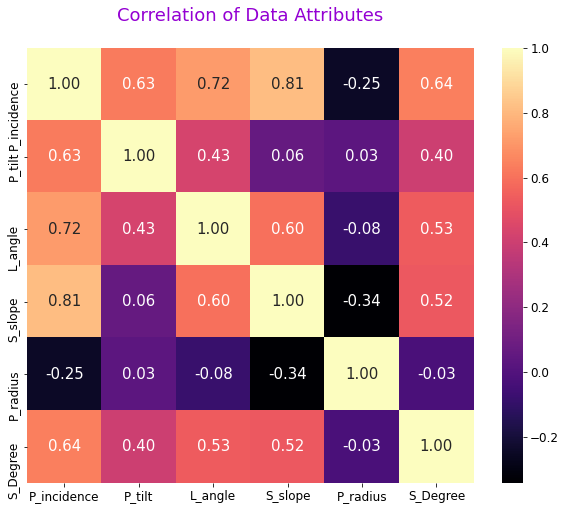

In [13]:
# Checking Correlation by plotting Heatmap for all independent attributes 
print('\033[1mHeatmap showing Correlation of Data attributes:-')
plt.figure(figsize=(10,8))
plt.title('Correlation of Data Attributes\n')
sns.heatmap(biodata.corr(),annot=True,fmt= '.2f',cmap='magma');
plt.show()

***
**Key Observations:-**
* Except attribute 'S_Degree' all other attributes has Mean almost equal to Median. Hence we can expect a Normal Distribution of the values.
* Attributes 'P_tilt' and 'S-Degree' contain Negative values, since they have minimum values in Negatives.
* In 'S-Degree' the 3rd quartile or 75 percentile is around 41, but the maximum value is 418. Hence there are some outliers or extreme values in the data.
* Also standard deviation of S-Degree is high.
* The Skewness table is showing some skewness not more than +/- 1 except S-Degree. Hence we can say data is not highly skewed.
* By observing heatmap we can say that most of values are positively correlated
***

### <span style="color:#9400D3"> * Perform a detailed Univariate, Bivariate and Multivariate Analysis with Appropriate detailed comments after Each Analysis.

### <u> Univariate Analysis</u>

Univariate Analysis is done on each attribute. Here we check the distribution of the attribute along with 5 point summary.

**Attribute 1: P_incidence**

Table showing information about P_incidence:-


P_incidence
count   310.000000
mean     60.496653
std      17.236520
min      26.147921
25%      46.430294
50%      58.691038
75%      72.877696
max     129.834041


Plot Showing Distribution of Attribute P_incidence:-



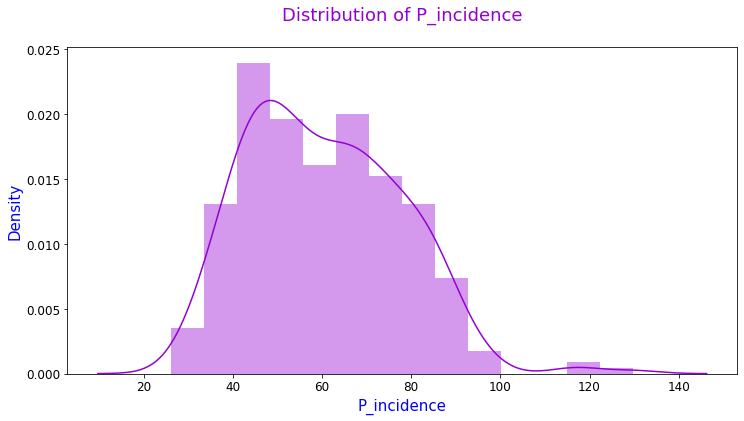

__________________________________________________________________________________________________

Plot Showing 5 point summary with outliers of Attribute P_incidence:-


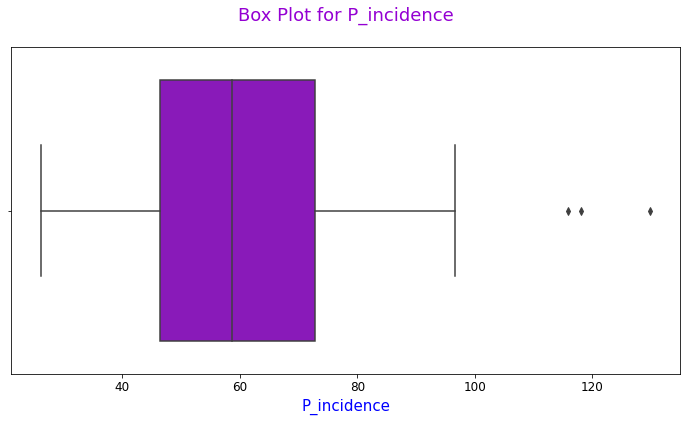

In [14]:
# Information about P_incidence
print('\033[1mTable showing information about P_incidence:-')
display(biodata['P_incidence'].describe().to_frame())

# Plotting Distribution for attribute P_incidence
print('\033[1m\nPlot Showing Distribution of Attribute P_incidence:-')
plt.figure(figsize=(12,6))
plt.title('Distribution of P_incidence\n')
sns.distplot(biodata['P_incidence'],color='#9400D3');
print('')
plt.show()
print('__________________________________________________________________________________________________')
print('')

# Plotting for 5 point summary with outliers of Attribute P_incidence
print('\033[1mPlot Showing 5 point summary with outliers of Attribute P_incidence:-')
plt.figure(figsize=(12,6))
plt.title('Box Plot for P_incidence\n')
sns.boxplot(biodata['P_incidence'],color="#9400D3");
plt.show()

***
**Key Observations:-**
* Mean and Median are almost same.
* Distribution of P_incidence is almost Normal.
* There is little deviation in the normal curve due to positive skewness.
* There are Outliers as observed by boxplot.
***

**Attribute 2: P_tilt**

Table showing information about P_tilt:-


P_tilt
count  310.000000
mean    17.542822
std     10.008330
min     -6.554948
25%     10.667069
50%     16.357689
75%     22.120395
max     49.431864


Plot Showing Distribution of Attribute P_tilt:-



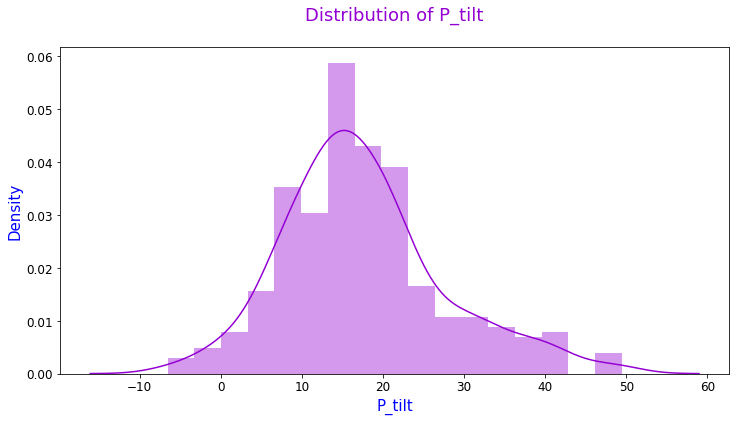

__________________________________________________________________________________________________

Plot Showing 5 point summary with outliers of Attribute P_tilt:-


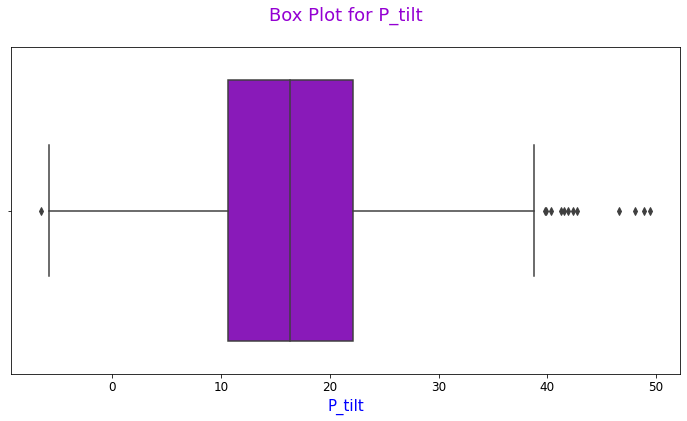

In [15]:
# Information about P_tilt
print('\033[1mTable showing information about P_tilt:-')
display(biodata['P_tilt'].describe().to_frame())

# Plotting Distribution for attribute P_tilt
print('\033[1m\nPlot Showing Distribution of Attribute P_tilt:-')
plt.figure(figsize=(12,6))
plt.title('Distribution of P_tilt\n')
sns.distplot(biodata['P_tilt'],color='#9400D3');
print('')
plt.show()
print('__________________________________________________________________________________________________')
print('')

# Plot for 5 point summary with outliers of Attribute P_tilt
print('\033[1mPlot Showing 5 point summary with outliers of Attribute P_tilt:-')
plt.figure(figsize=(12,6))
plt.title('Box Plot for P_tilt\n')
sns.boxplot(biodata['P_tilt'],color="#9400D3");
plt.show()

***
**Key Observations:-**
* Mean and Median are almost equal.
* We can observe negatives in minimum value.
* Distribution of P_tilt is Normal.
* There is tiny deviation in the normal curve due to skewness.
* There are Outliers as observed by boxplot.
***

**Attribute 3: L_angle**

Table showing information about L_angle:-


L_angle
count  310.000000
mean    51.930930
std     18.554064
min     14.000000
25%     37.000000
50%     49.562398
75%     63.000000
max    125.742385


Plot Showing Distribution of Attribute L_angle:-



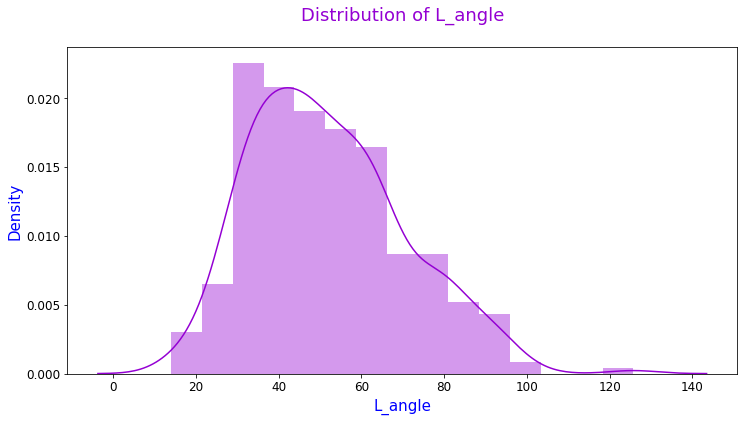

__________________________________________________________________________________________________

Plot Showing 5 point summary with outliers of Attribute L_angle:-


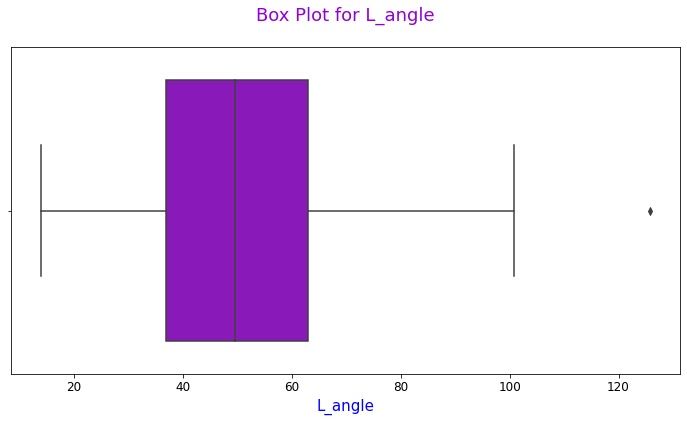

In [16]:
# Information about L_angle
print('\033[1mTable showing information about L_angle:-')
display(biodata['L_angle'].describe().to_frame())

# Plotting Distribution for attribute L_angle
print('\033[1m\nPlot Showing Distribution of Attribute L_angle:-')
plt.figure(figsize=(12,6))
plt.title('Distribution of L_angle\n')
sns.distplot(biodata['L_angle'],color='#9400D3');
print('')
plt.show()
print('__________________________________________________________________________________________________')
print('')

# Plot for 5 point summary with outliers of Attribute L_angle
print('\033[1mPlot Showing 5 point summary with outliers of Attribute L_angle:-')
plt.figure(figsize=(12,6))
plt.title('Box Plot for L_angle\n')
sns.boxplot(biodata['L_angle'],color="#9400D3");
plt.show()

***
**Key Observations:-**
* Mean and Median are almost same.
* Distribution of L_angle is almost Normal.
* There is some deviation in the normal curve due to skewness.
* We can observe Positive Skewness here.
* There are Outliers as observed by boxplot.
***

**Attribute 4: S_slope**

Table showing information about S_slope:-


S_slope
count  310.000000
mean    42.953831
std     13.423102
min     13.366931
25%     33.347122
50%     42.404912
75%     52.695888
max    121.429566


Plot Showing Distribution of Attribute S_slope:-



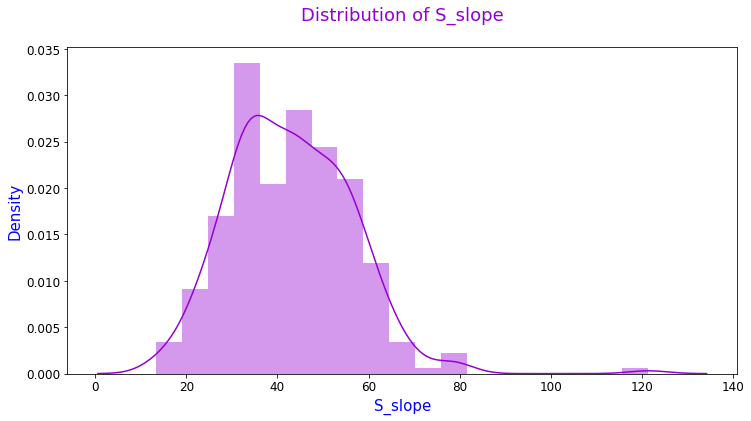

__________________________________________________________________________________________________

Plot Showing 5 point summary with outliers of Attribute S_slope:-


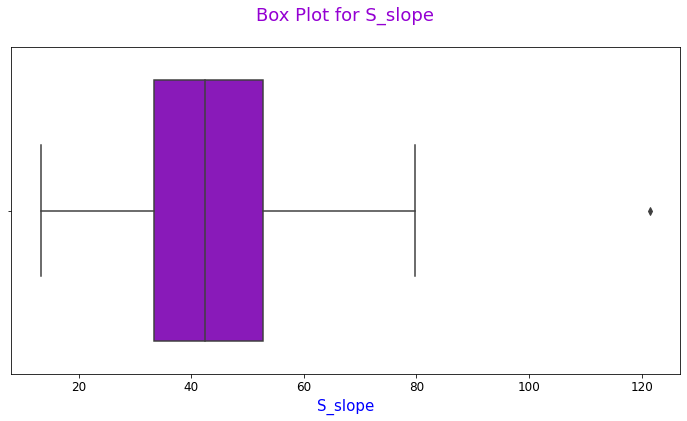

In [17]:
# Information about S_slope
print('\033[1mTable showing information about S_slope:-')
display(biodata['S_slope'].describe().to_frame())

# Plotting Distribution for attribute S_slope
print('\033[1m\nPlot Showing Distribution of Attribute S_slope:-')
plt.figure(figsize=(12,6))
plt.title('Distribution of S_slope\n')
sns.distplot(biodata['S_slope'],color='#9400D3');
print('')
plt.show()
print('__________________________________________________________________________________________________')
print('')

# Plot for 5 point summary with outliers of Attribute S_slope
print('\033[1mPlot Showing 5 point summary with outliers of Attribute S_slope:-')
plt.figure(figsize=(12,6))
plt.title('Box Plot for S_slope\n')
sns.boxplot(biodata['S_slope'],color="#9400D3");
plt.show()

***
**Key Observations:-**
* Mean and Median are almost equal.
* Distribution of S_slope is almost Normal.
* We can observe Positive Skewness since outlier having high value.
* There are Outliers as observed by boxplot.
***

**Attribute 5: P_radius**

Table showing information about P_radius:-


P_radius
count  310.000000
mean   117.920655
std     13.317377
min     70.082575
25%    110.709196
50%    118.268178
75%    125.467674
max    163.071041


Plot Showing Distribution of Attribute P_radius:-



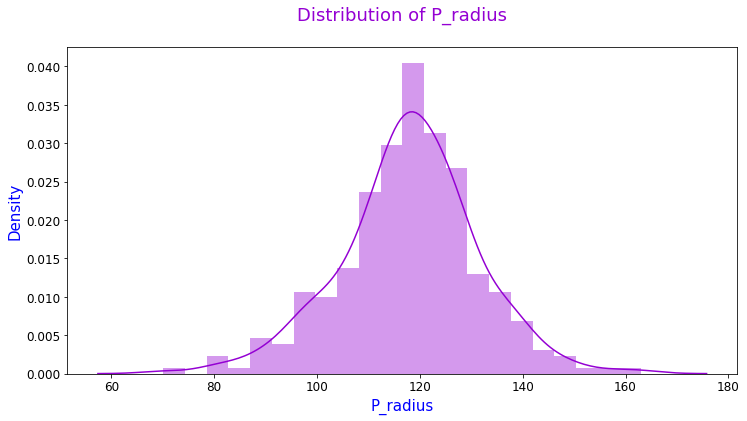

__________________________________________________________________________________________________

Plot Showing 5 point summary with outliers of Attribute P_radius:-


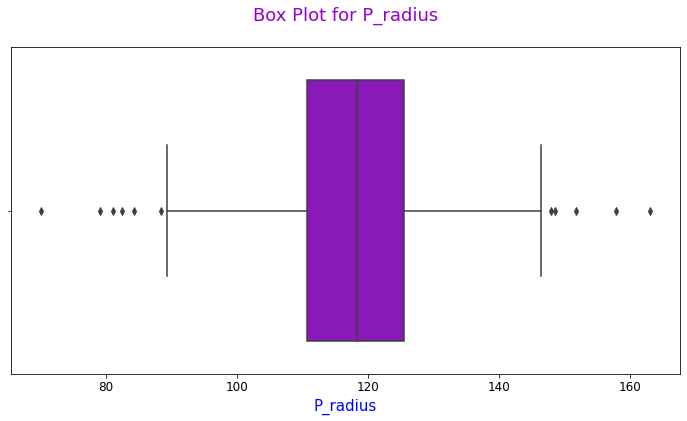

In [18]:
# Information about P_radius
print('\033[1mTable showing information about P_radius:-')
display(biodata['P_radius'].describe().to_frame())

# Plotting Distribution for attribute P_radius
print('\033[1m\nPlot Showing Distribution of Attribute P_radius:-')
plt.figure(figsize=(12,6))
plt.title('Distribution of P_radius\n')
sns.distplot(biodata['P_radius'],color='#9400D3');
print('')
plt.show()
print('__________________________________________________________________________________________________')
print('')

# Plot for 5 point summary with outliers of Attribute P_radius
print('\033[1mPlot Showing 5 point summary with outliers of Attribute P_radius:-')
plt.figure(figsize=(12,6))
plt.title('Box Plot for P_radius\n')
sns.boxplot(biodata['P_radius'],color="#9400D3");
plt.show()

***
**Key Observations:-**
* Mean and Median are almost equal.
* Distribution of P_radius is Normal.
* We can observe Outliers at both ends.
***

**Attribute 6: S_Degree**

Table showing information about S_Degree:-


S_Degree
count  310.000000
mean    26.296694
std     37.559027
min    -11.058179
25%      1.603727
50%     11.767934
75%     41.287352
max    418.543082


Plot Showing Distribution of Attribute S_Degree:-



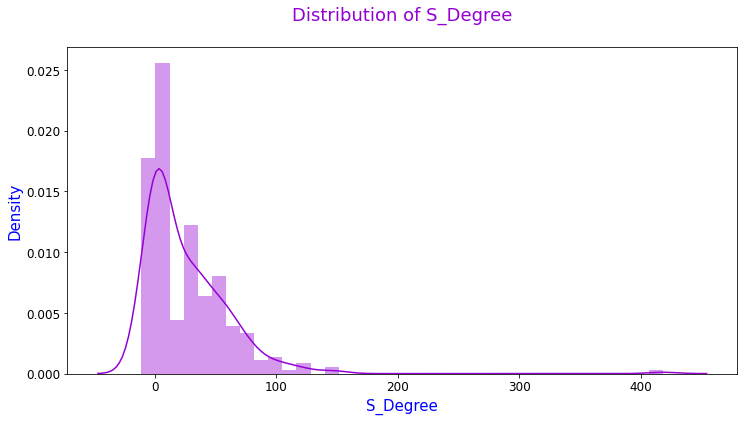

__________________________________________________________________________________________________

Plot Showing 5 point summary with outliers of Attribute S_Degree:-


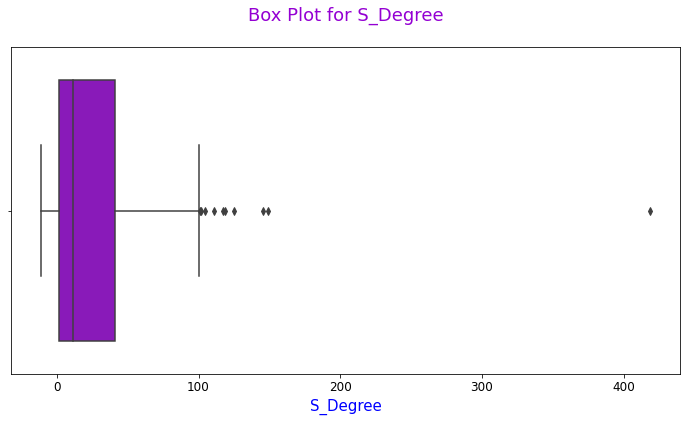

In [19]:
# Information about S_Degree
print('\033[1mTable showing information about S_Degree:-')
display(biodata['S_Degree'].describe().to_frame())

# Plotting Distribution for attribute S_Degree
print('\033[1m\nPlot Showing Distribution of Attribute S_Degree:-')
plt.figure(figsize=(12,6))
plt.title('Distribution of S_Degree\n')
sns.distplot(biodata['S_Degree'],color='#9400D3');
print('')
plt.show()
print('__________________________________________________________________________________________________')
print('')

# Plot for 5 point summary with outliers of Attribute S_Degree
print('\033[1mPlot Showing 5 point summary with outliers of Attribute S_Degree:-')
plt.figure(figsize=(12,6))
plt.title('Box Plot for S_Degree\n')
sns.boxplot(biodata['S_Degree'],color="#9400D3");
plt.show()

***
**Key Observations:-**
* Mean and Median are Different.
* We can observe negatives in minimum value.
* Distribution of S_Degree is Positively Skewed.
* Since there is large influence of outlier, the curve is shifted to right.
***

**Attribute 7: Class**

Table showing information about Class:-


Class
count      310
unique       3
top     Type_S
freq       150


Plot Showing Frequency Distribution of Attribute Class:-


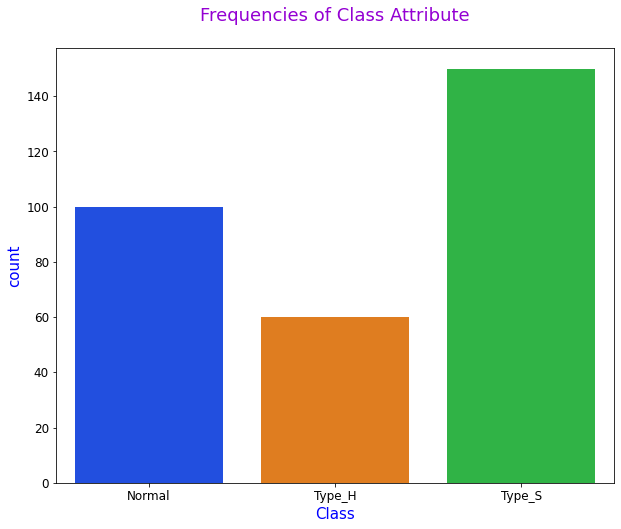

___________________________________________________________________________________

Pie Chart Showing Contribution of Each Category of Attribute Class:-


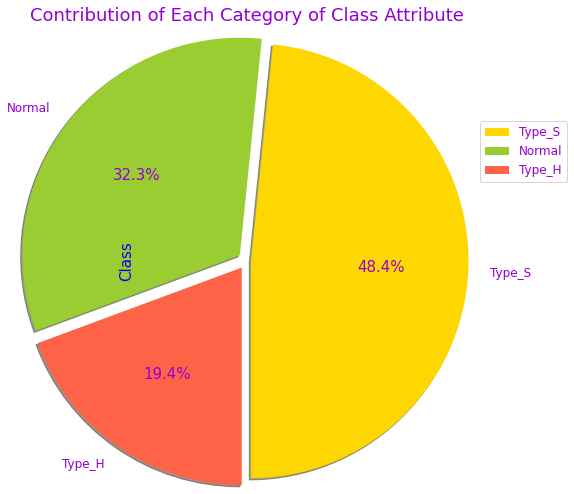

In [20]:
# Information about Class
print('\033[1mTable showing information about Class:-')
display(biodata['Class'].describe().to_frame())

# Plotting Frequency Distribution for attribute Class
colors = ['gold', 'yellowgreen', 'tomato']
print('\033[1m\nPlot Showing Frequency Distribution of Attribute Class:-')
plt.figure(figsize=(10,8))
plt.title('Frequencies of Class Attribute\n')
sns.countplot(biodata['Class'],palette='bright');
plt.show()
print('___________________________________________________________________________________')
print('')

# Plotting Pie Chart to check contribution
print('\033[1mPie Chart Showing Contribution of Each Category of Attribute Class:-')
plt.title('Contribution of Each Category of Class Attribute\n\n\n\n\n\n')
explode = (0.05, 0.1, 0.1)
biodata['Class'].value_counts().plot.pie(radius=2.5,explode=explode,shadow=True,autopct='%1.1f%%',startangle=-90,colors=colors);
plt.legend(loc='right',prop={'size': 12}, bbox_to_anchor=(2, 1))
plt.show()

***
**Key Observations:-**
* By observing frequency distribution we can say that Type_S has high frequency compared to other classes.
* When we observe Pie Chart we can conclude Type_S with 48.4% contribution, stood as highest contributing class.
***

### <u> Bivariate Analysis</u>
    
* Bivariate Analysis is performed to find the relationship between each variable in the dataset and the target variable of interest. 
* In our dataset we have "Class" as target variable.
* To do analysis here we are using Violin plots because Violin plot depicts distributions of numeric data for one or more groups using density curves. The width of each curve corresponds with the approximate frequency of data points in each region.

**Bivariate Analysis 1: Class VS P_incidence**

Plot Showing Bivariate Analysis of Class VS P_incidence:-


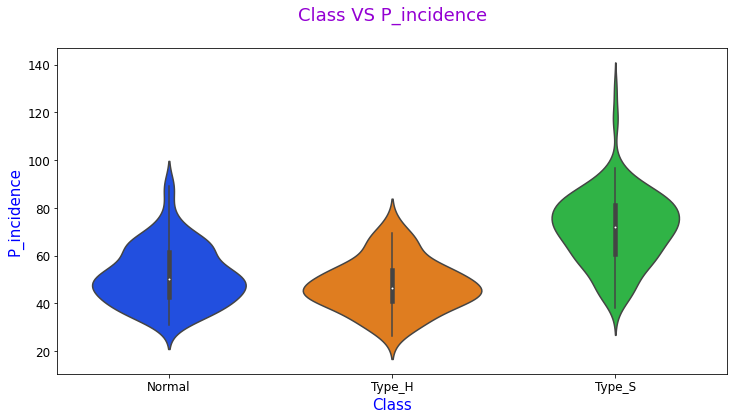

In [21]:
# Bivariate Analysis of Class VS P_incidence Attributes
print('\033[1mPlot Showing Bivariate Analysis of Class VS P_incidence:-')
plt.figure(figsize=(12,6))
plt.title('Class VS P_incidence\n')
sns.violinplot(x='Class', y='P_incidence', data=biodata, palette='bright');
plt.show()

***
**Key Observations:-**
* By observing above plot we can say Type_S has higher P_incidence values and also there are extreme values.
* P_incidence values of Type_H is low when compared to other categories.
* Some high density can be seen in Type_H.
***

**Bivariate Analysis 2: Class VS P_tilt**

Plot Showing Bivariate Analysis of Class VS P_tilt:-


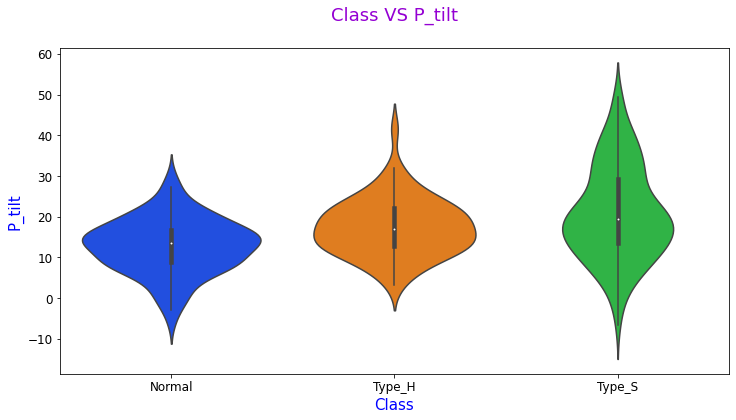

In [22]:
# Bivariate Analysis of Class VS P_tilt Attributes
print('\033[1mPlot Showing Bivariate Analysis of Class VS P_tilt:-')
plt.figure(figsize=(12,6))
plt.title('Class VS P_tilt\n')
sns.violinplot(x='Class', y='P_tilt', data=biodata, palette='bright');
plt.show()

***
**Key Observations:-**
* By observing above plot we can say Type_S has higher P_tilt values.
* Some high density can be seen in Normal as well as Type_H attributes.
***

**Bivariate Analysis 3: Class VS L_angle**

Plot Showing Bivariate Analysis of Class VS L_angle:-


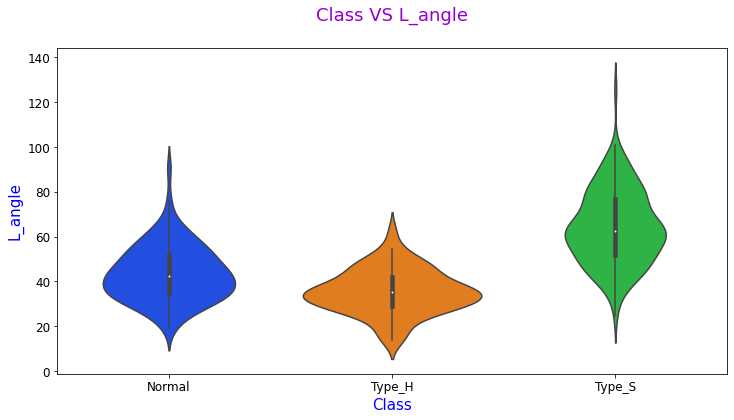

In [23]:
# Bivariate Analysis of Class VS L_angle Attributes
print('\033[1mPlot Showing Bivariate Analysis of Class VS L_angle:-')
plt.figure(figsize=(12,6))
plt.title('Class VS L_angle\n')
sns.violinplot(x='Class', y='L_angle', data=biodata, palette='bright');
plt.show()

***
**Key Observations:-**
* By observing above plot we can say Type_S has higher L_angle values.
* Type_H has got high density in some areas.
* L_angle of Normal is quite high than Type_H.
***

**Bivariate Analysis 4: Class VS S_slope**

Plot Showing Bivariate Analysis of Class VS S_slope:-


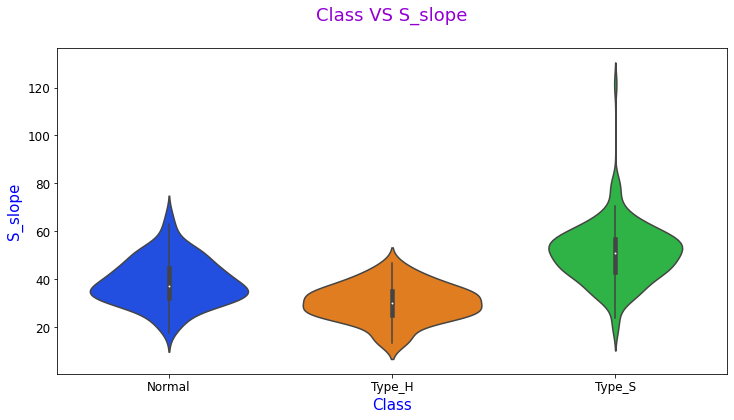

In [24]:
# Bivariate Analysis of Class VS S_slope Attributes
print('\033[1mPlot Showing Bivariate Analysis of Class VS S_slope:-')
plt.figure(figsize=(12,6))
plt.title('Class VS S_slope\n')
sns.violinplot(x='Class', y='S_slope', data=biodata, palette='bright');
plt.show()

***
**Key Observations:-**
* By observing above plot we can say Type_S has higher S_slope values.
* Type_H and Normal have high density in some areas.
***

**Bivariate Analysis 5: Class VS P_radius**

Plot Showing Bivariate Analysis of Class VS P_radius:-


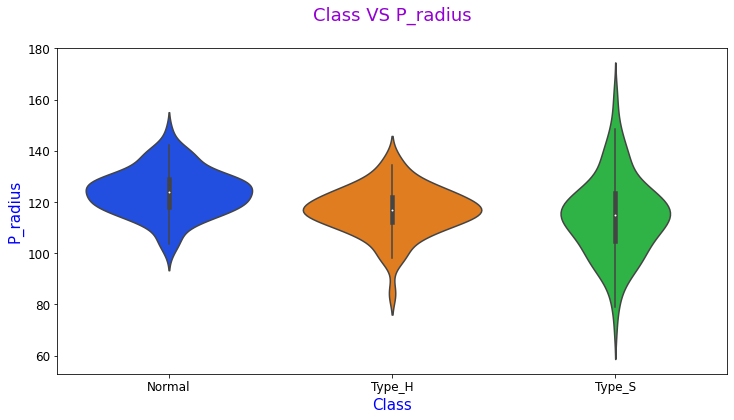

In [25]:
# Bivariate Analysis of Class VS P_radius Attributes
print('\033[1mPlot Showing Bivariate Analysis of Class VS P_radius:-')
plt.figure(figsize=(12,6))
plt.title('Class VS P_radius\n')
sns.violinplot(x='Class', y='P_radius', data=biodata, palette='bright');
plt.show()

***
**Key Observations:-**
* By observing above plot we can say Normal has higher P_radius values.
* Type_S has got some outliers or extreme values.
* Type_H and Normal have high density in some areas.
***

**Bivariate Analysis 6: Class VS S_Degree**

Plot Showing Bivariate Analysis of Class VS S_Degree:-


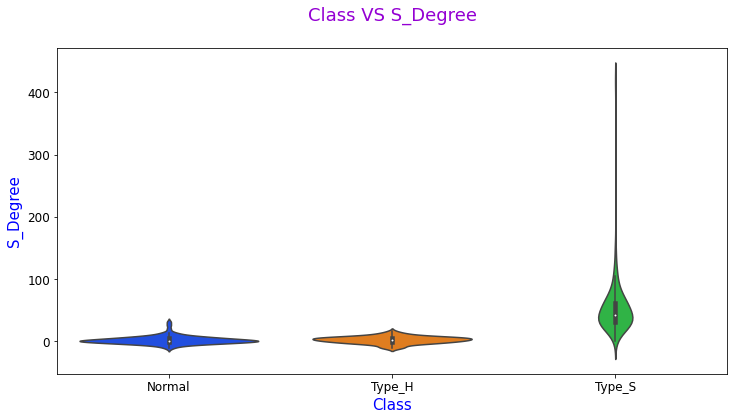

In [26]:
# Bivariate Analysis of Class VS S_Degree Attributes
print('\033[1mPlot Showing Bivariate Analysis of Class VS S_Degree:-')
plt.figure(figsize=(12,6))
plt.title('Class VS S_Degree\n')
sns.violinplot(x='Class', y='S_Degree', data=biodata, palette='bright');
plt.show()

***
**Key Observations:-**
* By observing above plot we can say Type_S has higher S_Degree values.
* Type_S has outliers or extreme values for S_Degree.
* Type_H and Normal have high density in some areas.
* All three categories has Negative S_Degree values.
***

### <u> Multivariate Analysis</u>
    
 Multivariate analysis is performed to understand interactions between different fields in the dataset.
    
**Multivariate Analysis : To Check Relation Between Independent Attributes**

Plot Showing Counts of Independent Attributes:-


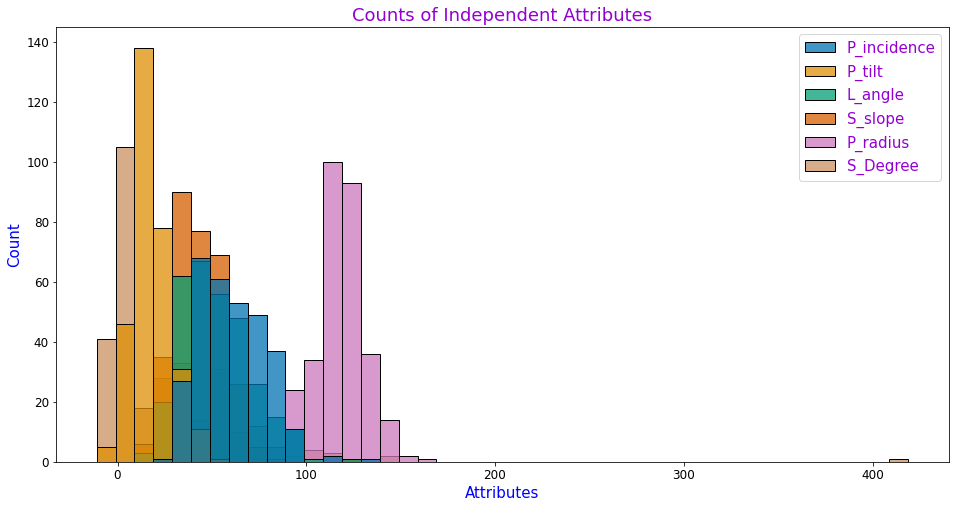


Plot Showing Multivariate Analysis to check Relation between Independent Attributes:-


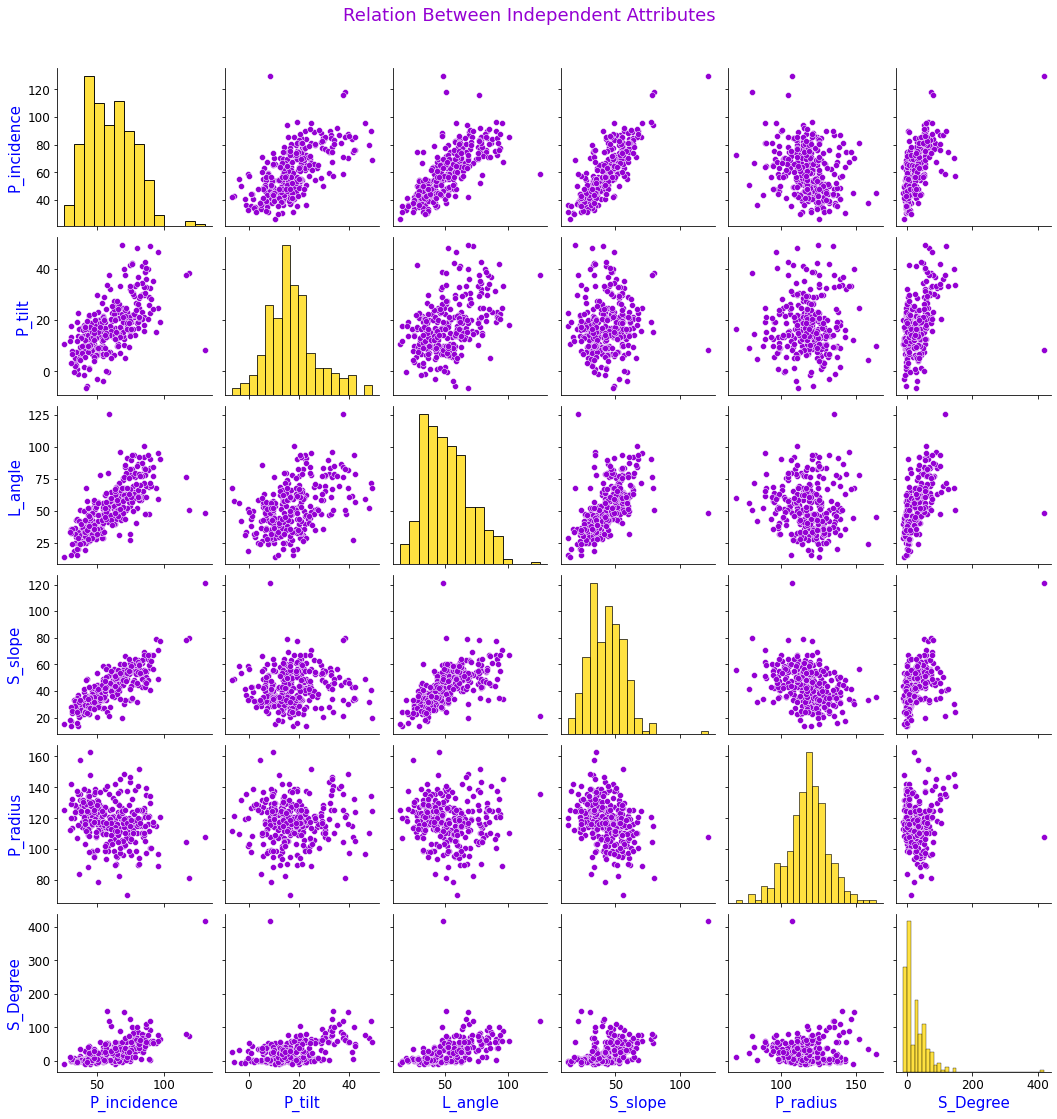

In [27]:
# Multivariate Analysis of Attributes

# Histogram for Independent Attributes
print('\033[1mPlot Showing Counts of Independent Attributes:-')
plt.figure(figsize=(16,8))
plt.xlabel('Attributes')
plt.title('Counts of Independent Attributes')
sns.histplot(biodata,bins=80,palette='colorblind',binwidth=10);
plt.show()

# Pair plot for Independent Attributes
print('\033[1m\nPlot Showing Multivariate Analysis to check Relation between Independent Attributes:-')
sns.pairplot(biodata,plot_kws={'color':'#9400D3'},diag_kws={'color':'Gold'}).fig.suptitle(
    'Relation Between Independent Attributes',y=1.04);
plt.show()

***
**Key Observations:-**
* By observing above plot, we can say that Type_S is more in every attribute when compared to other categories.
* P_radius does not have any particular relation with any of attribute.
* P_incidence has positive correlation with all attributes except P_radius. 
* P_tilt has got low positive linear relation with L_angle and S_degree.
* S_Degree has less correlation with all attributes.
* S_Slope has got positive linear relation with P_incidence and L_angle. 
***

**Multivariate Analysis : To check Density of Categorical Attribute in all other Attributes**

Plot Showing Multivariate Analysis to check Density of Categorical Attribute:-


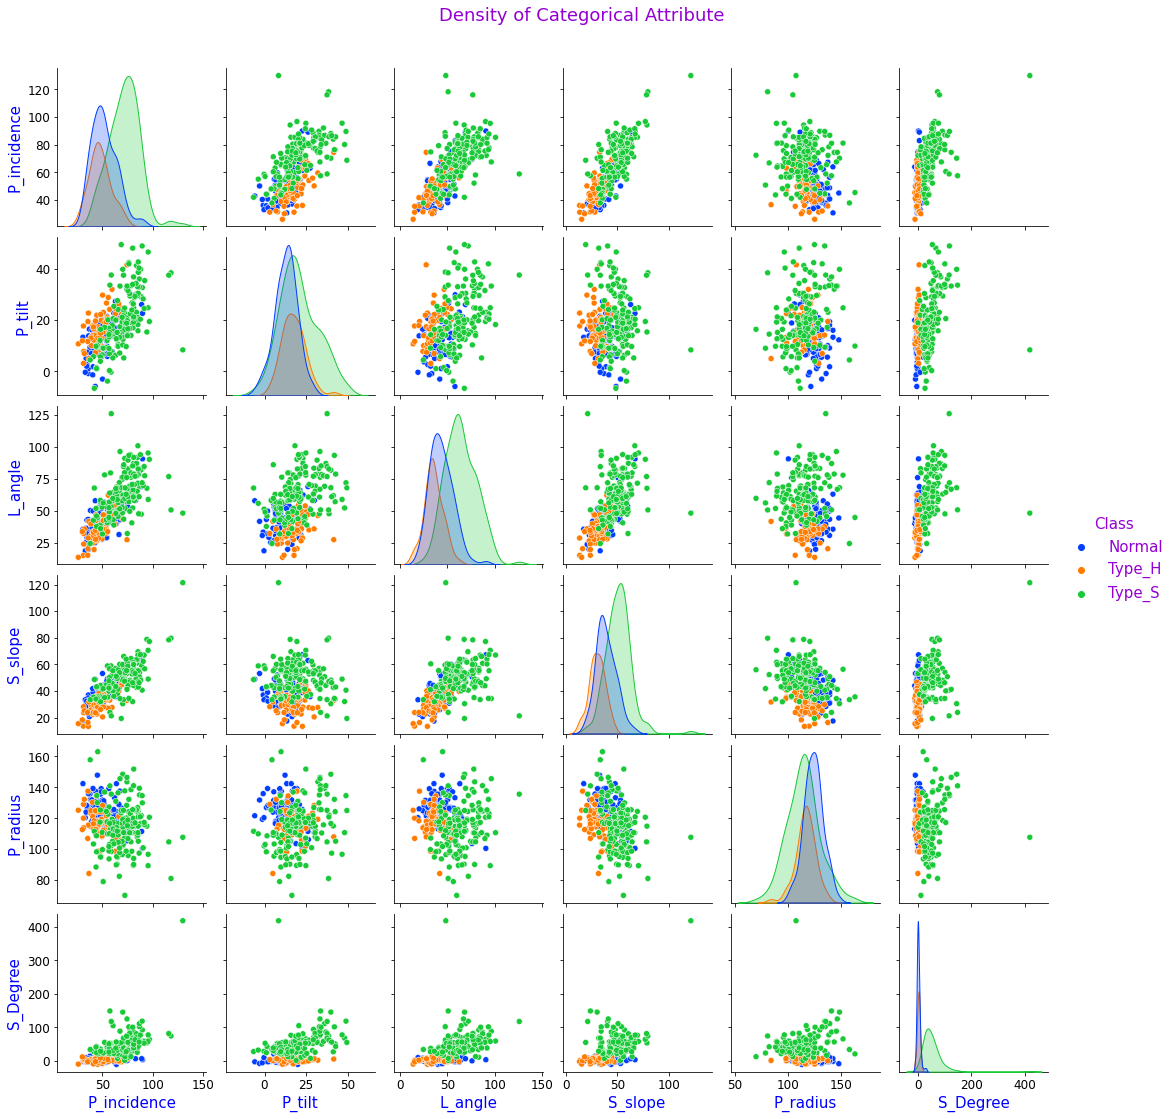

In [28]:
# Multivariate Analysis to check Density of Categorical Attribute
print('\033[1mPlot Showing Multivariate Analysis to check Density of Categorical Attribute:-')
sns.pairplot(biodata,hue='Class',palette='bright').fig.suptitle('Density of Categorical Attribute',y=1.04);
plt.show()

***
**Key Observations:-**
* Its clear that Type_S is more in every attribute when we observe above plot.
* Also Type_S has spread more in every attribute when compared to other attributes.
***

**Multivariate Analysis : To Check Correlation**

Heatmap showing Correlation of Data attributes:-


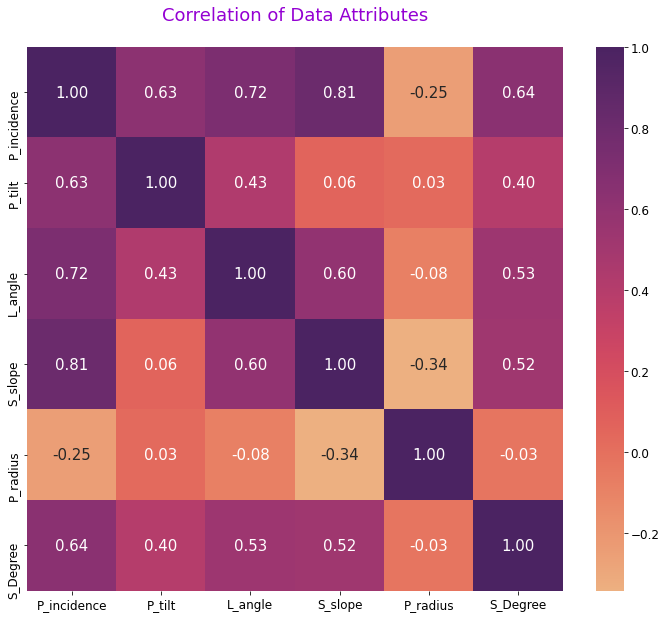

In [29]:
# Plotting Heatmap for checking Correlation
print('\033[1mHeatmap showing Correlation of Data attributes:-')
plt.figure(figsize=(12,10))
plt.title('Correlation of Data Attributes\n')
sns.heatmap(biodata.corr(),annot=True,fmt= '.2f',cmap='flare');
plt.show()

***
**Key Observations:-**
* Heatmap shows most of the data are Positively Correlated.
* P_radius has negative correlation with all attributes except P_tilt.
* P_incidence is highly positive correlated with all attributes except P_radius.
* S_slope and P_incidence are highly correlated compared to others.

***
## <span style="color:#9400D3">4. Data Pre-Processing:

### Outlier Analysis

* Outlier Analysis is a process that involves identifying the anomalous observation in the dataset.”
* An outlier is an observation that lies an abnormal distance from other values in the attribute of dataset.
* Since we have few outliers or extreme values, we will replace them by their respective mean of attribute.

NOTE:- Here we are Replacing Outliers by Mean of the Attribute without outliers. That is we will calculate Mean without outliers and then replace outliers with this calculated Mean

In [30]:
# Getting Outliers and Imputing Outliers by Mean

AT = []
OL1 = []
OL2 = []
M1 = []
M2 = []
for i in biodata.columns:
    if i!='Class':
        AT.append(i)
        
        # Getting Interquartile Range
        q1 = biodata[i].quantile(0.25)
        q3 = biodata[i].quantile(0.75)
        IQR = q3 - q1
        
        # Getting Mean of Attribute having Outliers (i.e including outliers)
        M1.append(round(biodata[i].mean(),2)) 
        
        # Getting Outlier and Normal Values Seperated
        OL = []
        NOL = []
        for k in biodata[i]:
            if (k < (q1 - 1.5 * IQR) or k > (q3 + 1.5 * IQR)):
                OL.append(k)
            else:
                NOL.append(k)
        OL1.append(len(OL))
        
        # Replacing Outliers by Mean of Normal Values
        biodata[i].replace(OL,np.mean(NOL),inplace=True) # Here we are imputing outliers by Mean of attribute without outlier
        M2.append(round(np.mean(NOL),2))
        
        # Getting Outliers After Imputation
        OL_cnt = 0
        for k in biodata[i]:
            if (k < (q1 - 1.5 * IQR) or k > (q3 + 1.5 * IQR)):
                OL_cnt += 1
        OL2.append(OL_cnt)
        
# Creting dataframe for better representation of Outlier Analysis      
Outlier_Analysis = pd.DataFrame({'Attribute':AT,
                                 'Mean Including Outliers':M1,
                                 'Outliers Before Imputation':OL1,
                                 'Mean Excluding Outliers':M2,
                                 'Outliers After Imputation':OL2})
print('\033[1mTotal Outliers Observed in Dataset =',sum(OL1))
print('\n\033[1mTable Showing Outlier Analysis:-')
display(Outlier_Analysis)        

Total Outliers Observed in Dataset = 39

Table Showing Outlier Analysis:-


Attribute  Mean Including Outliers  Outliers Before Imputation  \
0  P_incidence                    60.50                           3   
1       P_tilt                    17.54                          13   
2      L_angle                    51.93                           1   
3      S_slope                    42.95                           1   
4     P_radius                   117.92                          11   
5     S_Degree                    26.30                          10   

   Mean Excluding Outliers  Outliers After Imputation  
0                    59.90                          0  
1                    16.57                          0  
2                    51.69                          0  
3                    42.70                          0  
4                   118.06                          0  
5                    22.20                          0

***
**Key Observations:-**
* Mean has changed when we remove outliers.
* All outliers are replaced by "Mean Excluding Outliers".
* Since S_Degree had high outlier values, we can see a large change in Mean when compared to other Attributes. 
***

## Encoding Categorical Attribute
We have "Class" as our Target Attribute with three different classes.
1. Normal
2. Type_H
3. Type_S

In [31]:
# Converting Target Attribute to Categorical Data Type
biodata['Class'] = biodata['Class'].astype('category')

# Encoding Target Attribute
biodata['Class'] = biodata['Class'].cat.codes

# For Better Observation 
print('\033[1mTable Showing Encoded Target Attributes:-')
Classes = pd.DataFrame({'Class':['Normal','Type_H','Type_S']})
Classes['Encoded Value'] = biodata.groupby('Class').size().index
Classes['Total Observations'] = biodata.groupby('Class').size()
display(Classes)

Table Showing Encoded Target Attributes:-


Class  Encoded Value  Total Observations
0  Normal              0                 100
1  Type_H              1                  60
2  Type_S              2                 150

***
**Key Observations:-**
* All three classes are encoded with 0,1 and 2 for Normal, Type_H and Type_S repectively.
***

### <span style="color:#9400D3"> * Segregate Predictors VS Target Attributes
  By sperating Predictors and Target attributes, we can perform further operations easily.

In [32]:
# Seperating Independent and Dependent Attributes

# Getting Predictors by dropping Class Attribute
X = biodata.drop(columns='Class')

# Getting Target Attribute
y = biodata['Class'] 

# Displaying Segregated Predictors
print('\033[1mTable Showing Segregated Predictors:-')
display(X.head())

Table Showing Segregated Predictors:-


P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910

***
**Key Observations:-**
* We have Segregated Predictors and Target Attributes and assigned them to X and y respectively
***

### <span style="color:#9400D3"> * Perform Normalisation or Scaling if Required.

Since our Data is Normally Distributed, we will do **Feature Scaling Standardization(Z-Score Normalization)**.

By Standardizing the values of dataset, we get the following statistics of the data distribution,
* Mean = 0
* Standard Deviation = 1

In [33]:
# Applying Z-Scores to Predictors
X_Scale = X.apply(zscore)

# Checking the Mean and Standard Deviation
print('\033[1mTable Showing Mean and Standard Deviation of Scaled Predictors:-')
display(X_Scale.describe()[1:3].T)

Table Showing Mean and Standard Deviation of Scaled Predictors:-


mean       std
P_incidence -1.923193e-16  1.001617
P_tilt       2.339079e-17  1.001617
L_angle     -1.196176e-16  1.001617
S_slope     -1.636684e-16  1.001617
P_radius    -1.147469e-15  1.001617
S_Degree    -2.918812e-16  1.001617

***
**Key Observations:-**
* The Mean values are approaching Zero.
* Standard Deviation is approaching One.
* Hecnce we have scaled Predictors to corresponding Z-Score.
***

### <span style="color:#9400D3"> * Check for Target Balancing. Add your comments.

* When observation in one class is higher than the observation in other classes then there exists a class imbalance.
* If imbalance of Target attribute is high, then model would be more bias towards higher observation class.

Table Showing Total Observations in each class:-
--> Normal = 0
    Type_H = 1
    Type_S = 2


Total Observations
2                 150
0                 100
1                  60



Pie Chart Showing Percentage of Each Category of Target Attribute:-


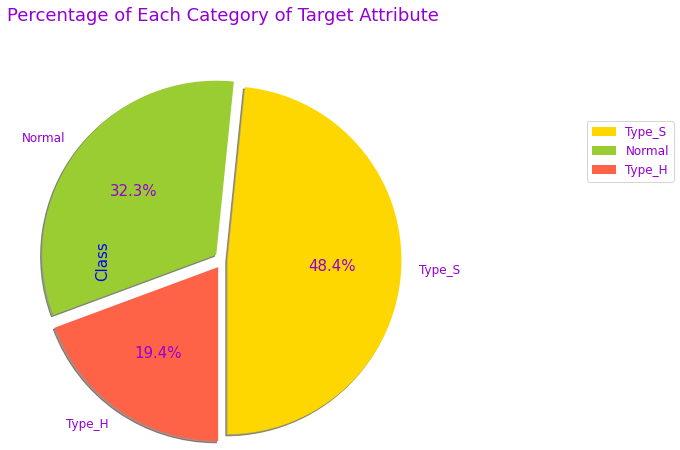

In [34]:
# Checking Value Counts of Target Attribute
print('\033[1mTable Showing Total Observations in each class:-')
print('\033[1m--> Normal = 0\n    Type_H = 1\n    Type_S = 2')
TAC = y.value_counts().to_frame('Total Observations')
display(TAC)

# Getting Percentages of each category in Target Attribute
labels = ['Type_S','Normal','Type_H']
print('\033[1m\n\nPie Chart Showing Percentage of Each Category of Target Attribute:-')
plt.title('Percentage of Each Category of Target Attribute\n\n\n\n\n\n')
explode = (0.05, 0.1, 0.1)
y.value_counts().plot.pie(radius=2,explode=explode,shadow=True,autopct='%1.1f%%',startangle=-90,labels=labels,colors=colors);
plt.legend(loc='right',prop={'size': 12}, bbox_to_anchor=(2.6, 1))
plt.show()

***
**Key Observations:-**
* By observing above data, we can clearly say that classes of Target variable are not equally distributed and hence there is imbalance in Target Attribute.
* About 48.4% of data is covered by Type_S which makes Types_S as highly distributed class.
* Due to this, model would be quiet bias towards Type_S.
* Type_H has covered 19.4% which makes Type_H as least distributed class.
***

### Fixing Target Imbalance by Synthetic Minority Oversampling Technique (SMOTE)

   SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

Table Showing Total Observations in each section of target data for SMOTE:-
--> Normal = 0
    Type_H = 1
    Type_S = 2


__________Total Observations__________                    
                        Before Tranformation After Tranformation
0                                        100                 150
1                                         60                 150
2                                        150                 150
Total                                    310                 450



Pie Chart Showing Percentage of Each Category of Target Attribute:-


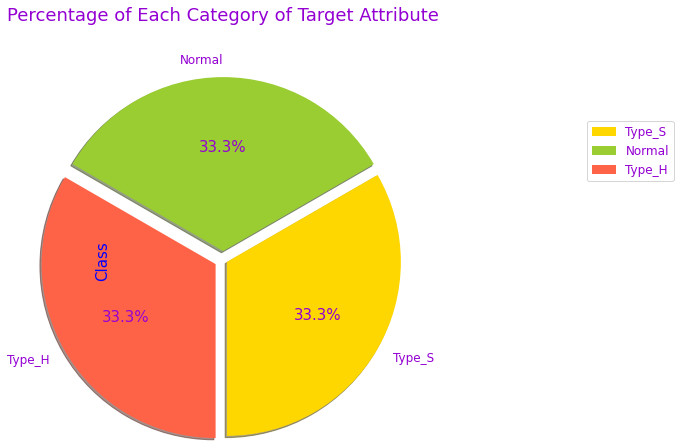

In [35]:
# Getting total observations of target attribute before transformation
yct = y.count()

# Transforming the dataset
OS = SMOTE(random_state=1)
X, y = OS.fit_resample(X_Scale, y)

# Checking Value Counts of Target Attribute after transforming
print('\033[1mTable Showing Total Observations in each section of target data for SMOTE:-') 
print('\033[1m--> Normal = 0\n    Type_H = 1\n    Type_S = 2')
TAC2 = y.value_counts().to_frame('Total Observations')

# For better representation of Transformation
TVC = pd.DataFrame({'Before Tranformation':TAC['Total Observations'],'After Tranformation':TAC2['Total Observations']})
total  = pd.Series({'Before Tranformation':yct,'After Tranformation':y.count()},name='Total')
TVC = TVC.append(total)
columns=[('__________Total Observations__________', 'Before Tranformation'), ('__________Total Observations__________', 
                                                                              'After Tranformation')]
TVC.columns = pd.MultiIndex.from_tuples(columns)
display(TVC)

# Getting Percentages of each category in Target Attribute
labels = ['Type_S','Normal','Type_H']
print('\033[1m\n\nPie Chart Showing Percentage of Each Category of Target Attribute:-')
plt.title('Percentage of Each Category of Target Attribute\n\n\n\n\n\n')
explode = (0.05, 0.1, 0.1)
y.value_counts().plot.pie(radius=2,explode=explode,shadow=True,autopct='%1.1f%%',startangle=-90,labels=labels,colors=colors);
plt.legend(loc='right',prop={'size': 12}, bbox_to_anchor=(2.6, 1))
plt.show()

***
**Key Observations:-**
* Target Imbalance has been fixed using SMOTE.
* Now Target variable has equal observations for all 3 classes.
* Total observation is changed from 310 to 450.
***

### <span style="color:#9400D3"> * Perform Train-Test Split.
 * The procedure involves taking a dataset and dividing it into two subsets.
 * The first subset is used to fit the model and is referred to as the training dataset. 
 * The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.
 * Here we keep 75:25 ratio i.e. 75% of data as Training set and 25% as Testing set.

In [36]:
# Splitting into Train and Test Sets in 

# Here test_size is not given because by default its value is 0.25.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# For better observation of Splitted Data
TTS = pd.DataFrame({'Train':y_train.value_counts(),'Test':y_test.value_counts(),'Total Observations':y.value_counts()})
total  = pd.Series({'Train':y_train.count(),'Test':y_test.count(),'Total Observations':y.shape[0]},name='Total')
TTS = TTS.append(total)
print('\033[1mTable Showing Train-Test Split of Data:-')
display(TTS)

Table Showing Train-Test Split of Data:-


Train  Test  Total Observations
0        113    37                 150
1        112    38                 150
2        112    38                 150
Total    337   113                 450

***
**Key Observations:-**
* We have Splitted data in 75:25 Ratio.
* Training data has 337 and Testing data has 113 observations.
***

## <span style="color:#9400D3">5. Model Training, Testing and Tuning:

### <span style="color:#9400D3"> * Design and Train a KNN Classifier.

* The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.
* In this we have to choose the K Nearest Neighbor value that reduces the number of errors we encounter while maintaining the algorithm’s ability to accurately make predictions.

In [37]:
# Building KNN Model
KNN = KNeighborsClassifier(metric = 'euclidean') # By default n_neighbor = 5

# Fitting Nearest Neighbour Algorithm on Train
KNN.fit(X_train, y_train)

# Predicting on the Test set
Prediction = KNN.predict(X_test)

***
**Key Observations:-**
* KNN Model is designed and trained.
* Here we used default K n_neighbor = 5 with Euclidean metric.
***

### <span style="color:#9400D3"> * Display the Classification Accuracies for Train and Test Data.


   * Accuracy is the number of correct predictions made by the model by the total number of records.

In [38]:
# Finding Accuracies for Train and Test
Train_AC = round(KNN.score(X_train, y_train)*100,2)
Test_AC = round(KNN.score(X_test, y_test)*100,2)

# For better Repesentation of Accuracies for Train and Test Data
print('\033[1mTable Showing Accuracies for Train and Test Data:-')
display(pd.DataFrame({'Data':['Training','Testing'],'Accuracy (%)':[Train_AC,Test_AC]}).set_index('Data'))

Table Showing Accuracies for Train and Test Data:-


Accuracy (%)
Data                  
Training         87.24
Testing          84.96

***
**Key Observations:-**
* Here Accuracies of Train and Test are not matching.
* It is due to Overfitting of Trainning data.
* Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data.
***

### <span style="color:#9400D3"> * Display and Explain the Classification Report in detail.
  * A Classification Report is used to measure the quality of predictions from a classification algorithm.
  * Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.
  * Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.
  * The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
  * Support is the number of actual occurrences of the class in the specified dataset.

In [39]:
# Getting Classification Report
CR = metrics.classification_report(y_test,Prediction,output_dict=True)

# Displaying Classification Report
print('\033[1mTable Showing Classification Report:-')
print('\033[1m--> Normal = 0\n    Type_H = 1\n    Type_S = 2')
display(pd.DataFrame(CR))

Table Showing Classification Report:-
--> Normal = 0
    Type_H = 1
    Type_S = 2


0          1          2  accuracy   macro avg  weighted avg
precision   0.852941   0.739130   1.000000  0.849558    0.864024      0.864122
recall      0.783784   0.894737   0.868421  0.849558    0.848981      0.849558
f1-score    0.816901   0.809524   0.929577  0.849558    0.852001      0.852312
support    37.000000  38.000000  38.000000  0.849558  113.000000    113.000000

***
**Key Observations:-**
* Type_S has high precision among all.
* Type_H has low precision.
* Recall is low for Normal.
* We can observe precision, recall and f1-score are almost same for accuracy and averages.
***

### Evaluating Performance of kNN Model
* Here we use Confusion Matrix which is a technique for summarizing the performance of a Classification Algorithm.

 Heatmap Showing Performance of KNN model:-


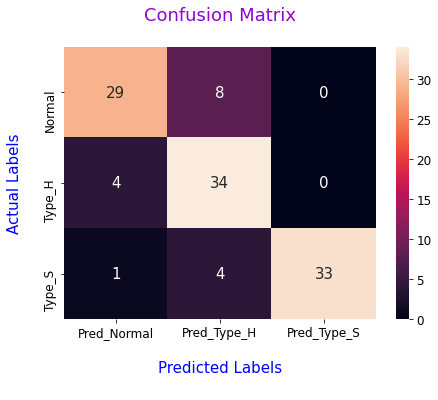

In [40]:
# Building Confusion Matrix
CM = metrics.confusion_matrix(y_test, Prediction)
Con_Mat = pd.DataFrame(CM, index=[i for i in ["Normal","Type_H","Type_S"]], columns=[i for i in ["Pred_Normal",
                                                                                                 "Pred_Type_H","Pred_Type_S"]])

# Displaying Confusion Matrix
print('\033[1m Heatmap Showing Performance of KNN model:-')
plt.figure(figsize = (7,5))
sns.heatmap(Con_Mat, annot=True)
plt.title('Confusion Matrix\n')
plt.xlabel('\nPredicted Labels\n')
plt.ylabel('Actual Labels\n')
plt.show()

***
**Key Observations:-**
* Type_S has been predicted Correctly most of time.
* Type_H and Normal have many misclassification.
* We can observe that most of time Type_H has been predicted as Normal and vice-versa.
***

### <span style="color:#9400D3"> * Automate the Task of Finding Best Values of K for KNN.

* A small value of k means that noise will have a higher influence on the result and a large value make it computationally expensive.
* So to find out the best K Value for our data we will compare Misclassification Error with the Nearest Neighbors.

**Step 1 : Calculating Misclassification Errors for all the Predicted values where K-Value will be odd and ranges from 1 to 50**

In [41]:
# Creating odd list of K-Value for KNN
k_val = list(range(1, 50, 2))

# Creating empty lists that will hold Misclassification Errors
Train_Error = []
Test_Error = []

# Getting Misclassification Errors for all the Predicted values
for i in k_val:
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    Train_scores = cross_val_score(knn, X_train, y_train, scoring='accuracy',cv=5)
    Test_scores = cross_val_score(knn, X_test, y_test, scoring='accuracy',cv=5)
    Train_Error.append(1-Train_scores.mean())      # 1 - Score = Error
    Test_Error.append(1-Test_scores.mean())

# Displaying Mean Errors for Train and Test data
print('\033[1mTable showing Mean Errors for Train and Test data:-')
display(pd.DataFrame({'Data':['Train','Test'],'Mean Error':[np.mean(Train_Error),np.mean(Test_Error)]}).set_index('Data'))

Table showing Mean Errors for Train and Test data:-


Mean Error
Data             
Train    0.198827
Test     0.210482

***
**Key Observations:-**
* Misclassification errors are calculated for Training and Testing set.
* Here we have used cross validation scores, and (1 - score) gives us Error.
***

**Step 2 : Plotting the Misclassification Error Values against K-Values to find Best Range of K-Value**

Plot Showing Misclassification Errors of Training Data for K-Values:-


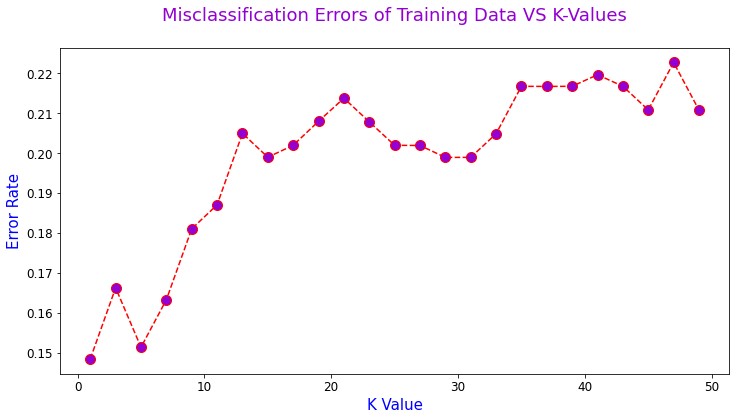

_____________________________________________________________________________________________________

Plot Showing Misclassification Errors of Testing Data for K-Values:-


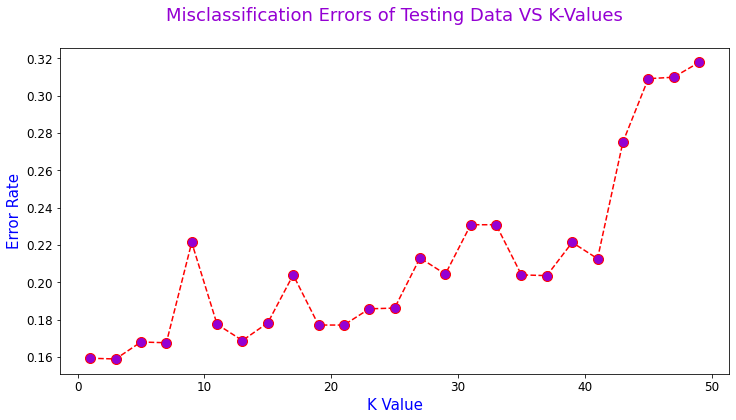

In [42]:
# Plot for Training Data

print('\033[1mPlot Showing Misclassification Errors of Training Data for K-Values:-')
plt.figure(figsize=(12, 6))
plt.title('Misclassification Errors of Training Data VS K-Values\n')
plt.plot(k_val, Train_Error, color='red',markerfacecolor='#9400D3', linestyle='dashed', marker='o', markersize=10)
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.show()
print('_____________________________________________________________________________________________________')
print('')

# Plot for Testing Data

print('\033[1mPlot Showing Misclassification Errors of Testing Data for K-Values:-')
plt.figure(figsize=(12, 6))
plt.title('Misclassification Errors of Testing Data VS K-Values\n')
plt.plot(k_val, Test_Error, color='red',markerfacecolor='#9400D3', linestyle='dashed', marker='o', markersize=10)
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.show()

***
**Key Observations:-**
* In Train set, there is not much change in Error Rate after K-Value 20.
* In case of Test set, after K = 20, there is rise in Error rate.
* So we can choose Nearest Neighbor Value within 20.
***

**Step 2 : Finding Best K-Value Within Range 1-20.**

In [43]:
# Creating K-Value List along with empty lists
K_Value = list(range(1,20,2))
train_ac = []
test_ac = []
normal = []
type_h = []
type_s = []

# Getting Accuracies and Precisions for K-Values
for i in K_Value:
    # Build KNN Model
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(X_train, y_train)
    # Appending Accuracies of Train and Test Sets
    train_ac.append(round(knn.score(X_train, y_train)*100,2))
    test_ac.append(round(knn.score(X_test, y_test)*100,2))
    # Prediction on Test Set
    pred = knn.predict(X_test)
    # Getting Classification Report
    cr = metrics.classification_report(y_test,pred,output_dict=True)
    normal.append(round(cr['0']['precision'],2))
    type_h.append(round(cr['1']['precision'],2))
    type_s.append(round(cr['2']['precision'],2))

# Creating Dataframe for better Representation
print('\033[1mTable Showing Accuracies and Precisions for K-Values:-')
KVal =pd.DataFrame({'K-Value':K_Value,'Train':train_ac,'Test':test_ac,'Normal':normal,'Type_H':type_h,
                    'Type_S':type_s}).set_index('K-Value')
columns=[('Accuracy (%)', 'Train'), ('Accuracy (%)', 'Test'), ('_______Precision_______', 'Normal'), 
         ('_______Precision_______', 'Type_H'), ('_______Precision_______', 'Type_S')]
KVal.columns = pd.MultiIndex.from_tuples(columns)
display(KVal)

Table Showing Accuracies and Precisions for K-Values:-


Accuracy (%)        _______Precision_______              
               Train   Test                  Normal Type_H Type_S
K-Value                                                          
1             100.00  95.58                    0.93   0.97   0.97
3              90.50  92.92                    0.92   0.88   1.00
5              87.24  84.96                    0.85   0.74   1.00
7              87.83  83.19                    0.87   0.70   1.00
9              85.46  82.30                    0.83   0.69   1.00
11             84.87  82.30                    0.89   0.68   1.00
13             83.98  82.30                    0.86   0.69   1.00
15             85.16  82.30                    0.87   0.69   1.00
17             84.27  85.84                    0.91   0.73   1.00
19             81.90  83.19                    0.89   0.69   1.00

***
**Key Observations:-**
* To choose best K-Value we have considered Accuracies and Precisions as our parameters.
* By Observing above table, we can say that for K = 3 we have well balanced high Accuracies of Train and Test sets.
* Also for K = 3, Precisions of Normal and Type_H are almost equal and Type_S is not changing much.
* Hence we choose K Nearest Neighbor Value as **K = 3**.
***

### Building KNN Model with K = 3 to Check Accuracies

In [44]:
# Building KNN Model for K=3 
KNN = KNeighborsClassifier(metric = 'euclidean',n_neighbors = 3) # By default n_neighbor = 5

# Fitting Nearest Neighbour Algorithm on Train
KNN.fit(X_train, y_train)

# Finding Accuracies for Train and Test
Train_AC2 = round(KNN.score(X_train, y_train)*100,2)
Test_AC2 = round(KNN.score(X_test, y_test)*100,2)

# For better Repesentation of Accuracies for Train and Test Data
print('\033[1mTable Showing Accuracies for Train and Test Data:-')
acc = pd.DataFrame({'Data':['Training','Testing'],'K=5 (Default)':[Train_AC,Test_AC],
                      'K=3':[Train_AC2,Test_AC2]}).set_index('Data')
columns=[('___Accuracy (%)___', 'K=5 (Default)'), ('___Accuracy (%)___', 'K=3')]
acc.columns = pd.MultiIndex.from_tuples(columns)
display(acc)

Table Showing Accuracies for Train and Test Data:-


___Accuracy (%)___       
              K=5 (Default)    K=3
Data                              
Training              87.24  90.50
Testing               84.96  92.92

***
**Key Observations:-**
* We can observe that, Accuracies of Train and Test data have improved alot.
* We can observe Testing accuracy is high than Training accuracy for K=3.
* That means our trained model is performing better for test data.
***

### <span style="color:#9400D3"> * Apply all the possible Tuning Techniques to Train the best Model for the given data. Select the final best Trained Model with your comments for selecting this Model.

* Here we first create a list of Models.
* Then we will find Accuracies and Error Rates of each Model using Cross Validation Scores (evaluating estimator performance).
* Data which we are tuning is Scaled with Z-Scores.

**List of different Models Applied to our Data:-**
   1. LogisticRegression()
   2. KNeighborsClassifier()
   3. GaussianNB()
   4. SVC(kernel='rbf')
   5. SVC(kernel='linear')
   6. RandomForestClassifier()
   7. DecisionTreeClassifier()

In [45]:
# Creating List of Models
Models = [LogisticRegression(), KNeighborsClassifier(n_neighbors=3, metric='euclidean'), GaussianNB(), SVC(gamma='auto'),
          SVC(kernel='linear',gamma='auto'), RandomForestClassifier(), DecisionTreeClassifier()]

# Getting Accuracies and Error Rates from Models
Model_Accuracy = []
Model_Error = []
for i in Models:
    Model_Accuracy.append(round(cross_val_score(i,X,y,scoring='accuracy',cv=5).mean(),3)*100)
    Model_Error.append(round(1-cross_val_score(i,X,y,scoring='accuracy',cv=5).mean(),3)*100)
    
# Displaying Accuracies and Error Rates from Models
print('\033[1mTable Showing Accuracies and Error Rates from Varius Algorithms:-')
model = ['Logistic Regression','K-Neighbors Classifier','Gaussian Naive Bayes','RBF Support Vector Classifier',
        'Linear Support Vector Classifier','Random Forest Classifier','Decision Tree Classifier']
display(pd.DataFrame({'Trained Model':model,'Accuracy (%)':Model_Accuracy,'Error Rate (%)':Model_Error}))

Table Showing Accuracies and Error Rates from Varius Algorithms:-


Trained Model  Accuracy (%)  Error Rate (%)
0               Logistic Regression          85.6            14.4
1            K-Neighbors Classifier          87.6            12.4
2              Gaussian Naive Bayes          81.6            18.4
3     RBF Support Vector Classifier          86.2            13.8
4  Linear Support Vector Classifier          86.4            13.6
5          Random Forest Classifier          90.4             9.6
6          Decision Tree Classifier          85.3            14.7

***
**Key Observations:-**
* Here we have applied 7 diffrent models to our dataset.
* Gaussian Naive Bayes showing high error rate.
* By observing above table we cay say, Random Forest Classifier	is showing better Performance for our Dataset. 
* Since Random Forest Classifier has high Accuracy and low Error Rate, we choose **Random Forest Classifier** as our final best Trained Model
***

## <span style="color:#9400D3">6. Conclusion and Improvisation:

### <span style="color:#9400D3"> * Write your Conclusion on the Results.
* In Biomechanics features of the patients, Type_S class has high frequency compared to other classes. That is majority of data is covered by Type_S class.
* All independent variables are Normally Distributes with little deviation and skewness.
* In K-Neighbor Algorithm, for K=3 the model perform better with good Accuracies.
* Random Forest Classifier is showing better Performance for our Dataset.

### <span style="color:#9400D3"> * Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the research team to perform a better data analysis in future.

* There was a imbalance in target variable, which is fixed using SMOTE.
* We got 39 Outliers or Extreme Values, which are replaced by Mean. 
* The Performance of Models can be improved if more number of data points are collected in dataset.
* It better to choose k-Neighbor value as 3 for better performance of model as there is a good balance in Accuracies of train and test data for k=3 in KNN Classifier. 
* After applying 7 different models to our data, we conclude Random Forest Classifier is better for this dataset as its Accuracy is high.
    
    
**Closing Sentence:- All Predictions that are generated by training Supervised Learning algorithms will help medical research University X for to understand patients with certain conditions.**


### <span style="color:#9400D3">-------------------------------------------------- End of Part ONE ------------------------------------------------------- 

<br>

***
# <span style="color:#9400D3">Part TWO - **Project Based**                          
***

**DOMAIN:** Banking and Finance
<br><br>
**CONTEXT:** A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee
majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the
borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an
average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing
department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit
with same budget as per last campaign.
<br><br>
**DATA DESCRIPTION:** The data consists of the following attributes:
1. ID: Customer ID
2. Age Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card.
<br><br>
**PROJECT OBJECTIVE:** Build an AIML model to perform focused marketing by predicting the potential customers who will
convert using the historical dataset.

**Steps and tasks:**
1. Import and warehouse data:
  * Import all the given datasets and explore shape and size of each.
  * Merge all datasets onto one and explore final shape and size.
  
  
2. Data cleansing:
  * Explore and if required correct the datatypes of each attribute
  * Explore for null values in the attributes and if required drop or impute values.
  
  
3. Data analysis & visualisation:
  * Perform detailed statistical analysis on the data.
  * Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.
  
  
4. Data pre-processing:
  * Segregate predictors vs target attributes
  * Check for target balancing and fix it if found imbalanced.
  * Perform train-test split.
  
  
5. Model training, testing and tuning:
  * Design and train a Logistic regression and Naive Bayes classifiers.
  * Display the classification accuracies for train and test data.
  * Display and explain the classification report in detail.
  * Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model.
  
  
6. Conclusion and improvisation:
  * Write your conclusion on the results.
  * Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the bank to perform a better data analysis in future.

***
## <span style="color:#9400D3">1. Import and Warehouse Data:

### <span style="color:#9400D3"> * Import all the given Datasets and Explore Shape and Size of each.
 * All Files are imported that are specified for Part 2 of project.
 * If any file fails to load, then a quick check is needed for file names.
 * Here we have 2 files, make sure that original file names match the names which are coded below.
 * All the files are in CSV format, if format of original file changes then error in loading files will appear.

In [46]:
# Loading the files and creating dataframes
Data1 = pd.read_csv('Data1.csv')
Data2 = pd.read_csv('Data2.csv')

# Getting Shape and Size of each data
D1 = Data1.shape
D2 = Data2.shape

# Displaying Data1 Dataset
print('\033[1m1. Data1 dataset consist:-\033[0m\n Number of Rows    =',D1[0],'\n Number of Columns =',D1[1])
display(Data1.head())
print('_________________________________________________________________________________')

# Displaying Data2 Dataset
print('\033[1m\n2. Data2 dataset consist:-\033[0m\n Number of Rows    =',D2[0],'\n Number of Columns =',D2[1])
display(Data2.head())

1. Data1 dataset consist:-
 Number of Rows    = 5000 
 Number of Columns = 8


ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  
0                  1.6      1  
1                  1.5      1  
2                  1.0      1  
3                  2.7      2  
4                  1.0      2

_________________________________________________________________________________

2. Data2 dataset consist:-
 Number of Rows    = 5000 
 Number of Columns = 7


ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0   1         0         1                    0                0           0   
1   2         0         1                    0                0           0   
2   3         0         0                    0                0           0   
3   4         0         0                    0                0           0   
4   5         0         0                    0                0           1   

   LoanOnCard  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

***
**Key Observations:-**
* All two Datasets has 5000 Rows.
* Data1 has 8 Attributes and Data2 has 7 Attributes.
* LoanOnCard Attribute consist NaN values which needs to be handled.
* Both datasets hav a common Attribute name "ID".
***

### <span style="color:#9400D3"> * Merge all Datasets onto One and Explore final Shape and Size.
  * Here we use pd.merge() to join two datasets.
  * Since attribute "ID" is common for both datasets, we will merge data based on "ID".

In [47]:
# Merging two Datasets with common Attribute ID
bankdata = pd.merge(Data1, Data2, how='inner', on = 'ID')

# Getting Shape and Size of final dataset
BD = bankdata.shape

# Displaying Final Dataset
print('\033[1mFinal Dataset consist:-\033[0m\n Number of Rows    =',BD[0],'\n Number of Columns =',BD[1])
display(bankdata.head(10))

Final Dataset consist:-
 Number of Rows    = 5000 
 Number of Columns = 14


ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   
5   6   37             13            29    92121            4   
6   7   53             27            72    91711            2   
7   8   50             24            22    93943            1   
8   9   35             10            81    90089            3   
9  10   34              9           180    93023            1   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  1.6      1         0         1                    0   
1                  1.5      1         0         1                    0   
2                  1.0      1         0         0                    0   
3                  2.7      2         0         0                    0   
4                  1.0      2         0         0                    0   
5                  0.4      2       155         0                    0   
6                  1.5      2         0         0                    0   
7                  0.3      3         0         0                    0   
8                  0.6      2       104         0                    0   
9                  8.9      3         0         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0                0           0         NaN  
1                0           0         NaN  
2                0           0         NaN  
3                0           0         NaN  
4                0           1         NaN  
5                1           0         NaN  
6                1           0         NaN  
7                0           1         NaN  
8                1           0         NaN  
9                0           0         1.0

***
**Key Observations:-**
* All two datasets have merged to single dataset name **"bankdata"**.
* Final dataset has 5000 Rows and 14 Columns.
* NaN values found in "LoanOnCard" Attribute.
***

## <span style="color:#9400D3">2. Data Cleansing:

### <span style="color:#9400D3"> * Explore and If Required Correct the Datatypes of each Attribute.

In [48]:
# Exploring dataset
print('\n\033[1mData Types of Each Attribute:-')
display(bankdata.dtypes.to_frame('Data Type'))


Data Types of Each Attribute:-


Data Type
ID                      int64
Age                     int64
CustomerSince           int64
HighestSpend            int64
ZipCode                 int64
HiddenScore             int64
MonthlyAverageSpend   float64
Level                   int64
Mortgage                int64
Security                int64
FixedDepositAccount     int64
InternetBanking         int64
CreditCard              int64
LoanOnCard            float64

***
**Key Observations:-**
* 14 Attributes of dataset has Numerical datatype (int and float).
* Datatypes of LoanOnCard Attribute is float. So it is better to convert it to binary integer datatype since it is a categorical feature.
* We will Change its Datatype, once we remove all NaN Values from it.
***

### <span style="color:#9400D3"> * Explore for Null Values in the Attributes and If Required Drop or Impute values.

In [49]:
# Checking for Null Values in the Attributes
print('\n\033[1mNull Values in the Features:-')
display(bankdata.isnull().sum().to_frame('Null Values'))


Null Values in the Features:-


Null Values
ID                             0
Age                            0
CustomerSince                  0
HighestSpend                   0
ZipCode                        0
HiddenScore                    0
MonthlyAverageSpend            0
Level                          0
Mortgage                       0
Security                       0
FixedDepositAccount            0
InternetBanking                0
CreditCard                     0
LoanOnCard                    20

**Comments:-**
* Attribute "LoanOnCard" has 20 Null values.
* All other Attributes have no Null values.

In [50]:
# Dropping Null Values
bankdata.dropna(inplace=True)

# Checking Shape of Dataset after dropping Null Values
shape = bankdata.shape
print('\033[1mAfter dropping Null values, Dataset consist:-\033[0m\n Number of Rows    =',shape[0],
      '\n Number of Columns =',shape[1])

# Checking for Null Values after dropping
print('\n\033[1mNull Values in the Attributes After Dropping:-')
display(bankdata.isnull().sum().to_frame('Null Values'))

After dropping Null values, Dataset consist:-
 Number of Rows    = 4980 
 Number of Columns = 14

Null Values in the Attributes After Dropping:-


Null Values
ID                             0
Age                            0
CustomerSince                  0
HighestSpend                   0
ZipCode                        0
HiddenScore                    0
MonthlyAverageSpend            0
Level                          0
Mortgage                       0
Security                       0
FixedDepositAccount            0
InternetBanking                0
CreditCard                     0
LoanOnCard                     0

***
**Key Observations:-**
* We found 20 Null values in "LoanOnCard" Attribute in the beginning.
* All Null Values are Dropped Successfully.
***

### Changing Datatype of LoanOnCard Attribute

In [51]:
# Changing Datatype of LoanOnCard Attribute
bankdata['LoanOnCard'] = bankdata['LoanOnCard'].astype('int')

# Exploring dataset after changing datatype
print('\n\033[1mData Types of Each Attribute:-')
display(bankdata.dtypes.to_frame('Data Type'))


Data Types of Each Attribute:-


Data Type
ID                      int64
Age                     int64
CustomerSince           int64
HighestSpend            int64
ZipCode                 int64
HiddenScore             int64
MonthlyAverageSpend   float64
Level                   int64
Mortgage                int64
Security                int64
FixedDepositAccount     int64
InternetBanking         int64
CreditCard              int64
LoanOnCard              int32

***
**Key Observations:-**
* Datatype of LoanOnCard is changed to binary integer values. (0 and 1)
***


## <span style="color:#9400D3">3. Data Analysis & Visualisation:

### <span style="color:#9400D3"> * Perform Detailed Statistical Analysis on the Data.
  * Statistical Analysis used to describe, show or summarize data from a sample in a meaningful way.
   
#### Brief Summary of Data

In [52]:
# Describing the data interms of count, mean, standard deviation, and 5 point summary
print('\n\033[1mBrief Summary of Dataset:-')
display(bankdata.describe().T)


Brief Summary of Dataset:-


count          mean          std     min       25%  \
ID                   4980.0   2510.345382  1438.011129    10.0   1265.75   
Age                  4980.0     45.352610    11.464212    23.0     35.00   
CustomerSince        4980.0     20.117671    11.468716    -3.0     10.00   
HighestSpend         4980.0     73.852410    46.070090     8.0     39.00   
ZipCode              4980.0  93152.420482  2123.660073  9307.0  91911.00   
HiddenScore          4980.0      2.395582     1.147200     1.0      1.00   
MonthlyAverageSpend  4980.0      1.939536     1.750006     0.0      0.70   
Level                4980.0      1.880924     0.840144     1.0      1.00   
Mortgage             4980.0     56.589759   101.836758     0.0      0.00   
Security             4980.0      0.104418     0.305832     0.0      0.00   
FixedDepositAccount  4980.0      0.060643     0.238697     0.0      0.00   
InternetBanking      4980.0      0.597189     0.490513     0.0      0.00   
CreditCard           4980.0      0.294378     0.455808     0.0      0.00   
LoanOnCard           4980.0      0.096386     0.295149     0.0      0.00   

                         50%        75%      max  
ID                    2510.5   3755.250   5000.0  
Age                     45.0     55.000     67.0  
CustomerSince           20.0     30.000     43.0  
HighestSpend            64.0     98.000    224.0  
ZipCode              93407.0  94608.000  96651.0  
HiddenScore              2.0      3.000      4.0  
MonthlyAverageSpend      1.5      2.525     10.0  
Level                    2.0      3.000      3.0  
Mortgage                 0.0    101.000    635.0  
Security                 0.0      0.000      1.0  
FixedDepositAccount      0.0      0.000      1.0  
InternetBanking          1.0      1.000      1.0  
CreditCard               0.0      1.000      1.0  
LoanOnCard               0.0      0.000      1.0

### Information about the Features

To Preprocess the data, we first differentiate between different types of Attributes.

#### 1. Qualitative Attributes:-

 * **Nominal Attributes:** 
  * ID      = Since ID has no relation with customer conversion and its information in not useful for our prediction model, we will Neglect ID Attribute.
  
  * ZipCode	= Zip Code starts from 9307 to 96651. This Attribute also useless for our prediction model.
  
  
 * **Binary Attributes:** 
  * Security            = 0 --> No Security asset, 1 --> there is Security asset. 
  * FixedDepositAccount	= 0 --> No Customer’s fixed deposit account, 1 --> there is Customer’s fixed deposit account.
  * InternetBanking     = 0 --> Customer doesn't uses internet banking, 1 --> Customer uses internet banking.
  * CreditCard          = 0 --> Customer doesn't uses Credit card, 1 --> Customer uses Credit card.
  * LoanOnCard          = 0 --> Customer has No loan on Credit card, 1 --> Customer has a loan on Credit card. This is Our **Target Attribute**
  
  
 * **Ordinal Attributes:**
  * HiddenScore = Score associated to the customer, with 1 as least and 4 as highest value.
  * Level	    = Level associated to the customer, with 1 as least and 3 as highest value.

#### 2. Quantitative Attributes:-

 * **Numeric Attributes**
  * Age           = Age of Customer, with 23 as least and 67 as highest value.
  * Mortgage      = Customer’s mortgage, with 0 as least and 635 as highest value.
  * CustomerSince = Customer of the bank since, with -3 as least and 43 as highest value. But it is in Negatives, may be due to error made while recording values.
  * HighestSpend  = Customer’s highest spend so far in one transaction, with 8 as minimum and 224 as maximum value.
  
  
 * **Continuous Attribute**
  * MonthlyAverageSpend = Customer’s monthly average spend so far, with 0 as least and 10 as highest value.

### Dropping ID and ZipCode Attributes

Since these two attributes do not give much information and are not helpful for our further process, we are dropping these attributes.

In [53]:
# Dropping ID and ZipCode Attributes
bankdata.drop(['ID','ZipCode'],axis=1,inplace=True)

# Getting Shape of data
bd = bankdata.shape

# Displaying Dataset after dropping columns
print('\033[1mFinal Dataset consist:-\033[0m\n Number of Rows    =',bd[0],'\n Number of Columns =',bd[1])
display(bankdata.head())

Final Dataset consist:-
 Number of Rows    = 4980 
 Number of Columns = 12


Age  CustomerSince  HighestSpend  HiddenScore  MonthlyAverageSpend  Level  \
9    34              9           180            1                  8.9      3   
10   65             39           105            4                  2.4      3   
11   29              5            45            3                  0.1      2   
12   48             23           114            2                  3.8      3   
13   59             32            40            4                  2.5      2   

    Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
9          0         0                    0                0           0   
10         0         0                    0                0           0   
11         0         0                    0                1           0   
12         0         1                    0                0           0   
13         0         0                    0                1           0   

    LoanOnCard  
9            1  
10           0  
11           0  
12           0  
13           0

<br>

### Cleaning  Negative Values of CustomerSince Attribute

#### Step 1 : Getting information about Negative Values

In [54]:
# Getting Negative Values in CustomerSince Attribute
CS = bankdata[bankdata['CustomerSince'] < 0]['CustomerSince']
print('\033[1mTotal Negative Values =',CS.count())
print('\033[1m\nTable Showing Negative values and its counts:-')
NCS = CS.value_counts().to_frame('Total Counts')
NCS.index.names = ['Negative CustomerSince']
display(NCS)

Total Negative Values = 51

Table Showing Negative values and its counts:-


Total Counts
Negative CustomerSince              
-1                                32
-2                                15
-3                                 4

#### Step 2 : Performing suitable operation on Negative values

* We have Mean and Meadian of CustomerSince Attribute equal to 20
* But in above table we have -1,-2 and -3 as negative values.
* So replacing these negative values with Mean or Median will not be a good choice.
* Instead we can convert these negative values to positive by using abs() function.

In [55]:
# Converting Negative Values of Custom erSince to Positive
bankdata['CustomerSince'] = bankdata['CustomerSince'].abs()

# Getting Negative Values in CustomerSince Attribute after doing abs()
CS = bankdata[bankdata['CustomerSince'] < 0]['CustomerSince'] 
print('\033[1mTotal Negative Values          =',CS.count())

# Getting Minimum and Maximum Values of CustomerSince
print('\033[1mMinimum Value of CustomerSince =',bankdata['CustomerSince'].min())
print('\033[1mMaximum Value of CustomerSince =',bankdata['CustomerSince'].max())

Total Negative Values          = 0
Minimum Value of CustomerSince = 0
Maximum Value of CustomerSince = 43


**Checking skewness of the data attributes**

In [56]:
# Checking skewness of the data attributes
print('\033[1mSkewness of all attributes:-')  
display(bankdata.skew().to_frame(name='Skewness'))

Skewness of all attributes:-


Skewness
Age                 -0.030794
CustomerSince       -0.011746
HighestSpend         0.839524
HiddenScore          0.156413
MonthlyAverageSpend  1.596001
Level                0.227298
Mortgage             2.102030
Security             2.587962
FixedDepositAccount  3.682770
InternetBanking     -0.396433
CreditCard           0.902595
LoanOnCard           2.736088

**Checking Covariance related with attributes**

In [57]:
# Checking Covariance related with all independent attributes
print('\033[1mCovariance between all attributes:-')
display(bankdata.cov())

Covariance between all attributes:-


Age  CustomerSince  HighestSpend  HiddenScore  \
Age                  131.428161     130.092827    -29.022661    -0.595630   
CustomerSince        130.092827     130.334568    -24.416885    -0.665065   
HighestSpend         -29.022661     -24.416885   2122.453208    -8.369401   
HiddenScore           -0.595630      -0.665065     -8.369401     1.316068   
MonthlyAverageSpend   -1.041168      -0.990641     52.091215    -0.219190   
Level                  0.411749       0.146496     -7.311814     0.063382   
Mortgage             -15.494802     -13.815000    972.275050    -2.499664   
Security               0.001133      -0.000732     -0.032186     0.006688   
FixedDepositAccount    0.021191       0.025806      1.864345     0.003923   
InternetBanking        0.063132       0.064604      0.320935     0.006133   
CreditCard             0.038376       0.044773     -0.058372     0.005639   
LoanOnCard            -0.027566      -0.029272      6.834473     0.020912   

                     MonthlyAverageSpend     Level      Mortgage  Security  \
Age                            -1.041168  0.411749    -15.494802  0.001133   
CustomerSince                  -0.990641  0.146496    -13.815000 -0.000732   
HighestSpend                   52.091215 -7.311814    972.275050 -0.032186   
HiddenScore                    -0.219190  0.063382     -2.499664  0.006688   
MonthlyAverageSpend             3.062522 -0.201455     19.652732  0.008084   
Level                          -0.201455  0.705842     -2.811664 -0.002426   
Mortgage                       19.652732 -2.811664  10370.725221 -0.155789   
Security                        0.008084 -0.002426     -0.155789  0.093533   
FixedDepositAccount             0.056981  0.002804      2.167482  0.023191   
InternetBanking                -0.002983 -0.005999     -0.351867  0.002101   
CreditCard                     -0.005246 -0.004506     -0.352799 -0.002024   
LoanOnCard                      0.189514  0.033974      4.266502  0.001984   

                     FixedDepositAccount  InternetBanking  CreditCard  \
Age                             0.021191         0.063132    0.038376   
CustomerSince                   0.025806         0.064604    0.044773   
HighestSpend                    1.864345         0.320935   -0.058372   
HiddenScore                     0.003923         0.006133    0.005639   
MonthlyAverageSpend             0.056981        -0.002983   -0.005246   
Level                           0.002804        -0.005999   -0.004506   
Mortgage                        2.167482        -0.351867   -0.352799   
Security                        0.023191         0.002101   -0.002024   
FixedDepositAccount             0.056976         0.020616    0.030347   
InternetBanking                 0.020616         0.240603    0.001109   
CreditCard                      0.030347         0.001109    0.207761   
LoanOnCard                      0.022272         0.000874    0.000341   

                     LoanOnCard  
Age                   -0.027566  
CustomerSince         -0.029272  
HighestSpend           6.834473  
HiddenScore            0.020912  
MonthlyAverageSpend    0.189514  
Level                  0.033974  
Mortgage               4.266502  
Security               0.001984  
FixedDepositAccount    0.022272  
InternetBanking        0.000874  
CreditCard             0.000341  
LoanOnCard             0.087113

**Checking Correlation by plotting Heatmap for attributes**

Heatmap showing Correlation of Data attributes:-


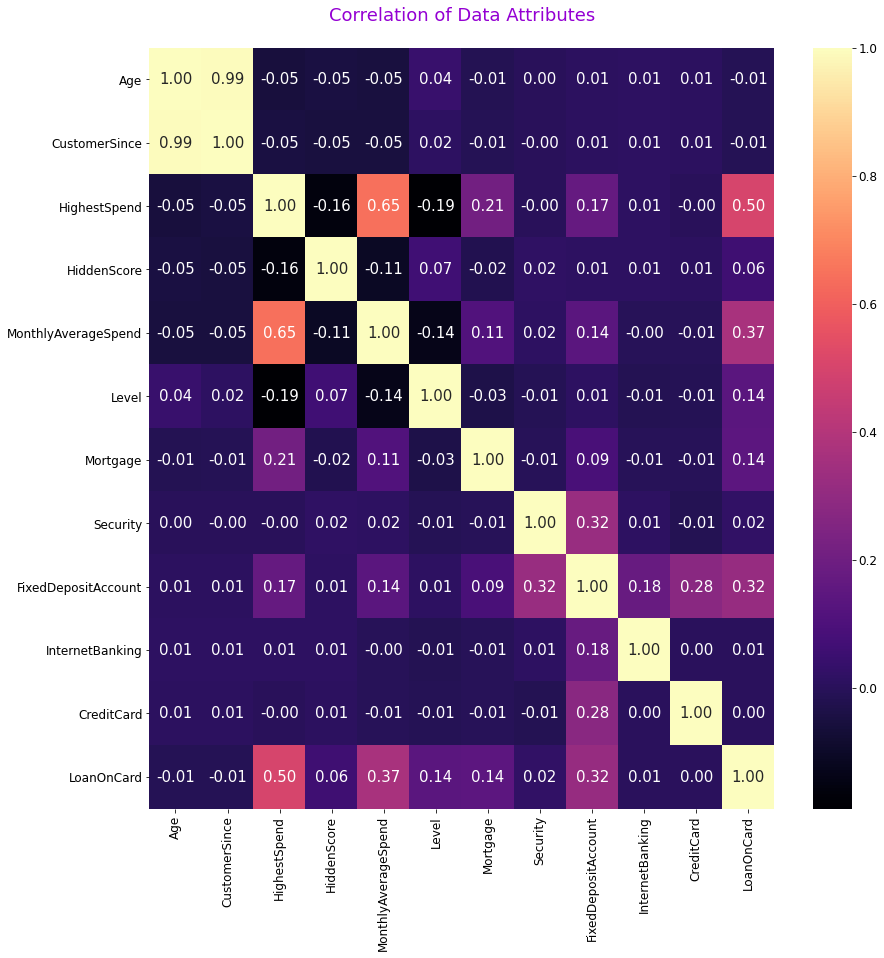

In [58]:
# Checking Correlation by plotting Heatmap for all independent attributes 
print('\033[1mHeatmap showing Correlation of Data attributes:-')
plt.figure(figsize=(14,14))
plt.title('Correlation of Data Attributes\n')
sns.heatmap(bankdata.corr(),annot=True,fmt= '.2f',cmap='magma');
plt.show()

***
**Key Observations:-**
* We have dropped ID and ZIP Codes attributes.
* Data has 7 categorical attributes and 5 discrete attributes. 
* 'Age','CustomerSince','HighestSpend' and 'MonthlyAverageSpend' attributes has Mean almost equal to Median. Hence we can expect a Normal Distribution of the values.
* CustomerSince had some negative values, may be due to error in recording observations. These values are converted to positives.
* Skewness table showing some variations. Some attributes have low skewness and some are having high skewness.
* Correlation table showing 50% positive correlation betwween LoanOnCard and HighestSpend.
* 'Age' and 'CustomerSince' has highest positive correlation 0f 0.99.
* Also 'HighestSpend' and 'MonthlyAverageSpend' are highly positively correlated.
***

### <span style="color:#9400D3"> * Perform a detailed Univariate, Bivariate and Multivariate Analysis with Appropriate detailed comments after Each Analysis.

### <u> Univariate Analysis</u>
Univariate analysis is the simplest form of analyzing data. It involves only one variable.
  
**Attribute 1: Age**

Plot Showing Distribution of Attribute Age:-



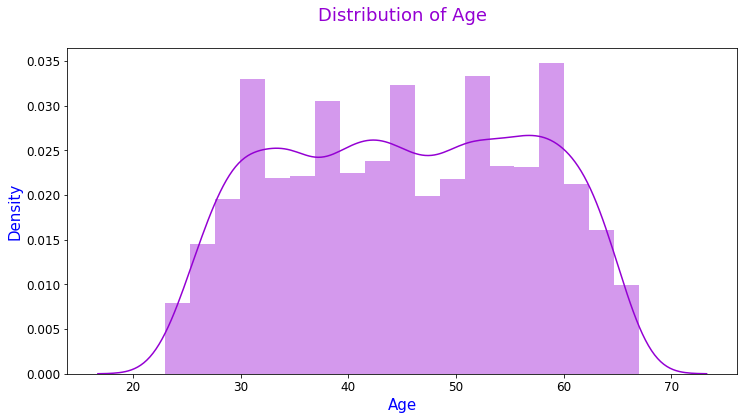

__________________________________________________________________________________________________

Plot Showing 5 point summary with outliers of Attribute Age:-


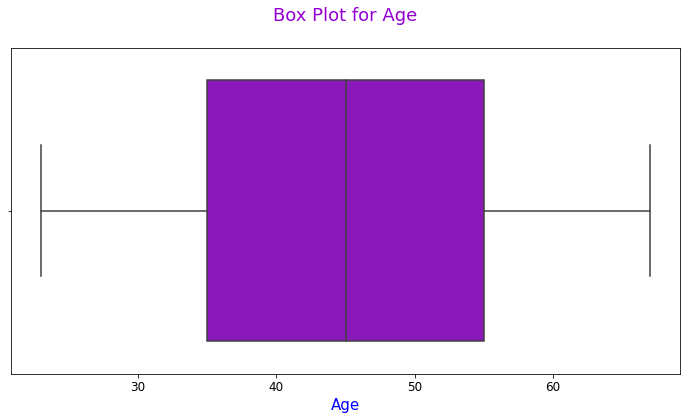

In [59]:
# Plotting Distribution for attribute Age
print('\033[1mPlot Showing Distribution of Attribute Age:-')
plt.figure(figsize=(12,6))
plt.title('Distribution of Age\n')
sns.distplot(bankdata['Age'],color='#9400D3');
print('')
plt.show()
print('__________________________________________________________________________________________________')
print('')

print('\033[1mPlot Showing 5 point summary with outliers of Attribute Age:-')
plt.figure(figsize=(12,6))
plt.title('Box Plot for Age\n')
sns.boxplot(bankdata['Age'],color="#9400D3");
plt.show()

***
**Key Observations:-**
* Density of Distribution of Age is high in the range 30 - 60. That means Customers of this age groups are showing more interest.
* Skewness is not observed as it is very low.
* There are No Outliers as observed in boxplot.
***

**Attribute 2: CustomerSince**

Plot Showing Distribution of Feature CustomerSince:-



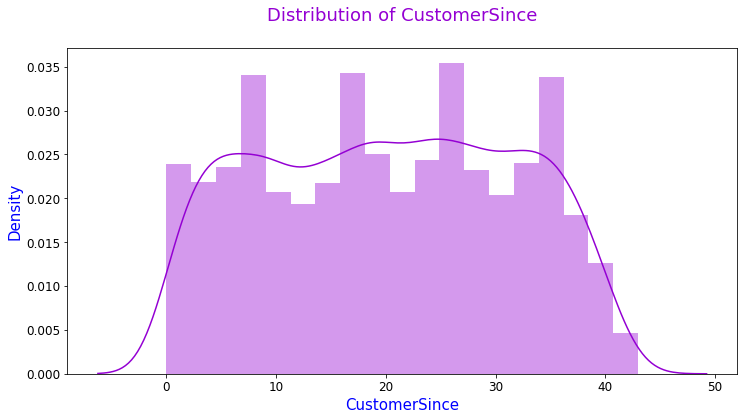

__________________________________________________________________________________________________

Plot Showing 5 point summary with outliers of Attribute CustomerSince:-


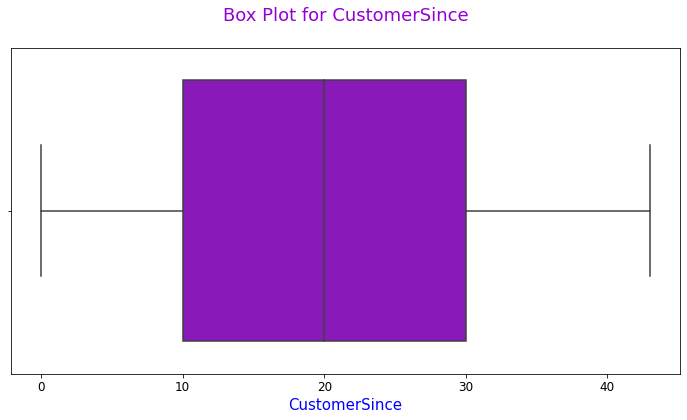

In [60]:
# Plotting Distribution for attribute CustomerSince
print('\033[1mPlot Showing Distribution of Feature CustomerSince:-')
plt.figure(figsize=(12,6))
plt.title('Distribution of CustomerSince\n')
sns.distplot(bankdata['CustomerSince'],color='#9400D3');
print('')
plt.show()
print('__________________________________________________________________________________________________')
print('')

print('\033[1mPlot Showing 5 point summary with outliers of Attribute CustomerSince:-')
plt.figure(figsize=(12,6))
plt.title('Box Plot for CustomerSince\n')
sns.boxplot(bankdata['CustomerSince'],color="#9400D3");
plt.show()

***
**Key Observations:-**
* Density of Distribution of CustomerSince is high in the range 10 - 30. That means Customers of this range of period are showing more interest.
* Skewness is not observed as it is very low.
* There are No Outliers as observed in boxplot.
***

**Attribute 3: HighestSpend**

Plot Showing Distribution of Attribute HighestSpend:-



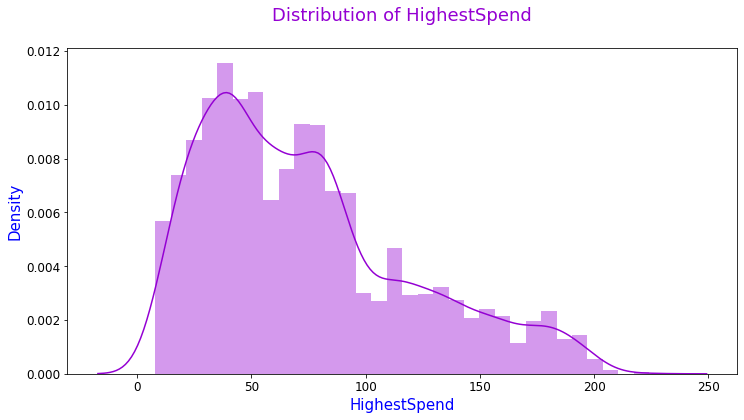

__________________________________________________________________________________________________

Plot Showing 5 point summary with outliers of Attribute HighestSpend:-


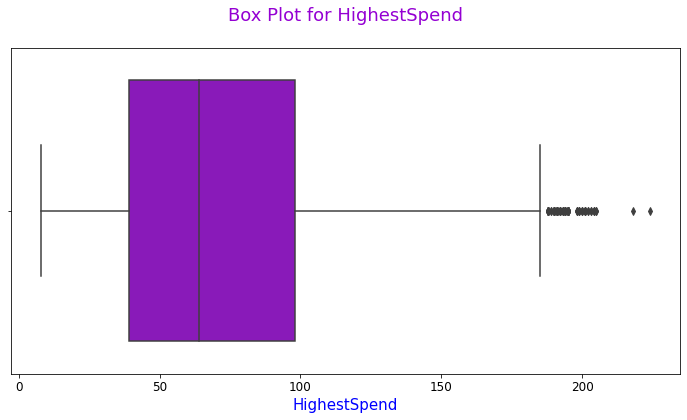

In [61]:
# Plotting Distribution for attribute HighestSpend
print('\033[1mPlot Showing Distribution of Attribute HighestSpend:-')
plt.figure(figsize=(12,6))
plt.title('Distribution of HighestSpend\n')
sns.distplot(bankdata['HighestSpend'],color='#9400D3');
print('')
plt.show()
print('__________________________________________________________________________________________________')
print('')

print('\033[1mPlot Showing 5 point summary with outliers of Attribute HighestSpend:-')
plt.figure(figsize=(12,6))
plt.title('Box Plot for HighestSpend\n')
sns.boxplot(bankdata['HighestSpend'],color="#9400D3");
plt.show()

***
**Key Observations:-**
* Density of Distribution of HighestSpend is high in the range 25 - 100. That means more Customers are spending within this range.
* Distribution is Right Skewed as its skewness is very high.
* There are many Outliers as observed by the boxplot.
***

**Attribute 4: HiddenScore** 

Plot Showing Frequency Distribution of Feature HiddenScore:-


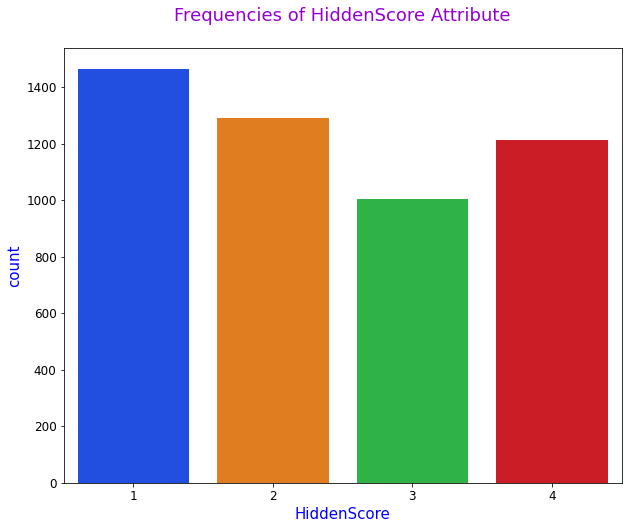

___________________________________________________________________________________

Pie Chart Showing Contribution of Each Category of HiddenScore feature:-


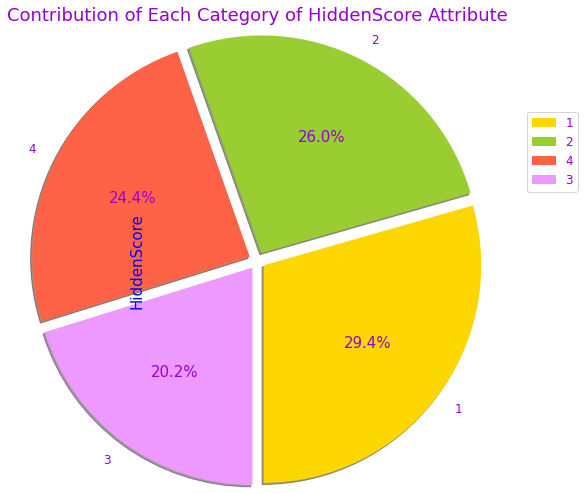

In [62]:
# Plotting Frequency Distribution for attribute HiddenScore
colors = ['gold', 'yellowgreen', 'tomato','#ee99ff']
print('\033[1mPlot Showing Frequency Distribution of Feature HiddenScore:-')
plt.figure(figsize=(10,8))
plt.title('Frequencies of HiddenScore Attribute\n')
sns.countplot(bankdata['HiddenScore'],palette='bright');
plt.show()
print('___________________________________________________________________________________')
print('')

# Plotting Pie Chart to check contribution
print('\033[1mPie Chart Showing Contribution of Each Category of HiddenScore feature:-')
plt.title('Contribution of Each Category of HiddenScore Attribute\n\n\n\n\n\n')
explode = (0.09, 0.1, 0.1, 0.1)
bankdata['HiddenScore'].value_counts().plot.pie(radius=2.5,explode=explode,shadow=True,autopct='%1.1f%%',startangle=-90,
                                                colors=colors);
plt.legend(loc='right',prop={'size': 12}, bbox_to_anchor=(2, 1))
plt.show()

***
**Key Observations:-**
* All Scores seems to be well balanced.
* HiddenScore = 1 has highest count. Hence it has spread more with 26% contribution, compared to other values.
* HiddenScore 3 has low contribution when compared to others.
***

**Attribute 5: MonthlyAverageSpend** 

Plot Showing Distribution of Feature MonthlyAverageSpend:-



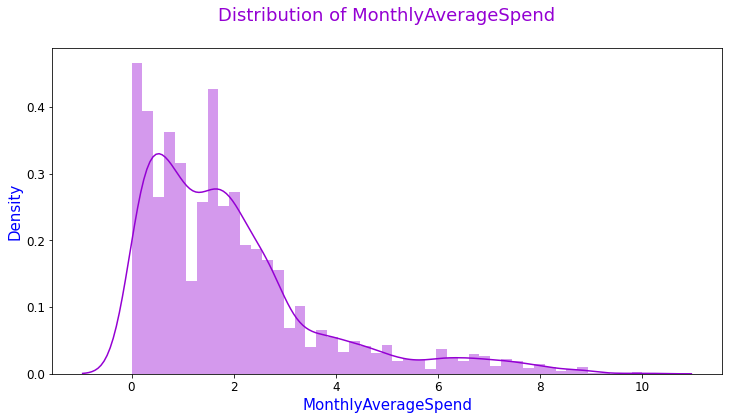

__________________________________________________________________________________________________

Plot Showing 5 point summary with outliers of Attribute MonthlyAverageSpend:-


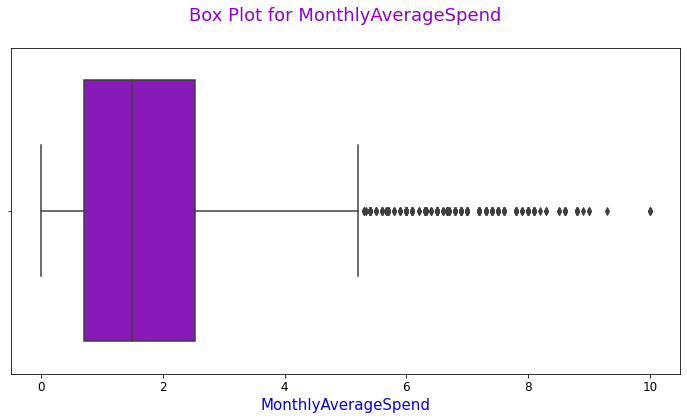

In [63]:
# Plotting Distribution for attribute MonthlyAverageSpend
print('\033[1mPlot Showing Distribution of Feature MonthlyAverageSpend:-')
plt.figure(figsize=(12,6))
plt.title('Distribution of MonthlyAverageSpend\n')
sns.distplot(bankdata['MonthlyAverageSpend'],color='#9400D3');
print('')
plt.show()
print('__________________________________________________________________________________________________')
print('')

print('\033[1mPlot Showing 5 point summary with outliers of Attribute MonthlyAverageSpend:-')
plt.figure(figsize=(12,6))
plt.title('Box Plot for MonthlyAverageSpend\n')
sns.boxplot(bankdata['MonthlyAverageSpend'],color="#9400D3");
plt.show()

***
**Key Observations:-**
* Density of Distribution of MonthlyAverageSpend is high in the range 0 - 2. That means most of Customer's MonthlyAverageSpend is quiet low.
* Distribution is Right Skewed as its skewness is very high.
* There are many Outliers as observed by the boxplot.
***

**Attribute 6: Level** 

Plot Showing Frequency Distribution of Attribute Level:-


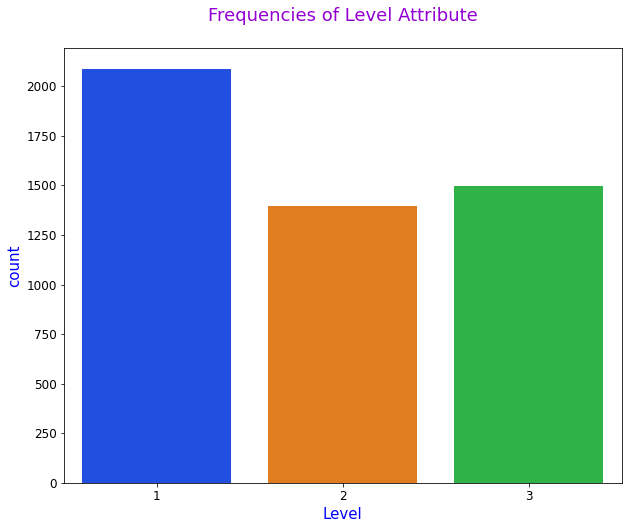

___________________________________________________________________________________

Pie Chart Showing Contribution of Each Category of Level feature:-


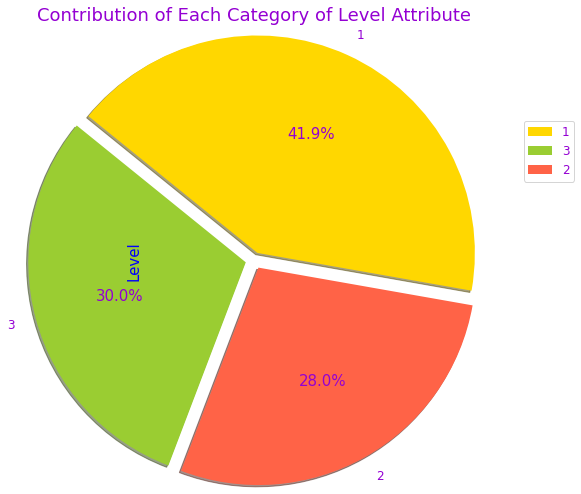

In [64]:
# Plotting Frequency Distribution for attribute Level
colors = ['gold', 'yellowgreen', 'tomato']
print('\033[1mPlot Showing Frequency Distribution of Attribute Level:-')
plt.figure(figsize=(10,8))
plt.title('Frequencies of Level Attribute\n')
sns.countplot(bankdata['Level'],palette='bright');
plt.show()
print('___________________________________________________________________________________')
print('')

# Plotting Pie Chart to check contribution
print('\033[1mPie Chart Showing Contribution of Each Category of Level feature:-')
plt.title('Contribution of Each Category of Level Attribute\n\n\n\n\n\n')
explode = (0.09, 0.1, 0.1)
bankdata['Level'].value_counts().plot.pie(radius=2.5,explode=explode,shadow=True,autopct='%1.1f%%',startangle=-10,
                                          colors=colors);
plt.legend(loc='right',prop={'size': 12}, bbox_to_anchor=(2, 1))
plt.show()

***
**Key Observations:-**
* There is some imbalance in Level.
* Level = 1 has highest count. 
* Level 1 is covering 41.9% of data.
* Level 2 and 3 have almost equal counts. There is 2% difference in contribution between them.
***

**Attribute 7: Mortgage** 

Plot Showing Distribution of Feature Mortgage:-



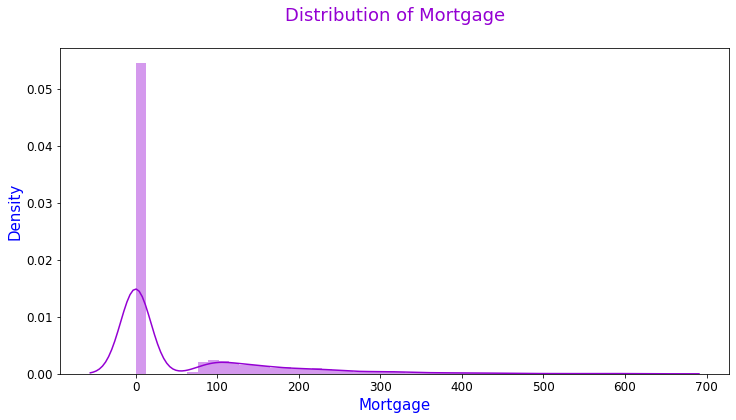

__________________________________________________________________________________________________

Plot Showing 5 point summary with outliers of Attribute Mortgage:-


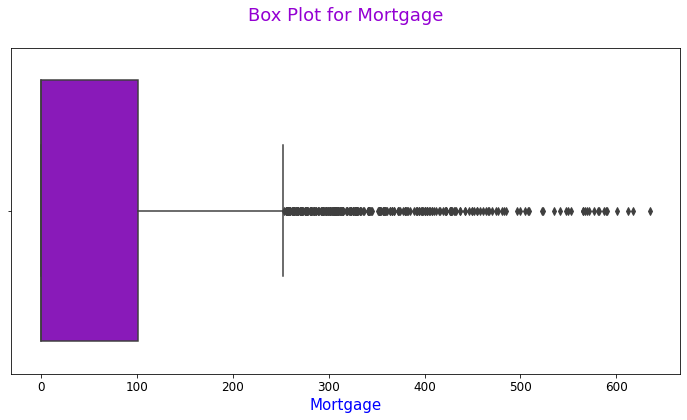

In [65]:
# Plotting Distribution for attribute Mortgage
print('\033[1mPlot Showing Distribution of Feature Mortgage:-')
plt.figure(figsize=(12,6))
plt.title('Distribution of Mortgage\n')
sns.distplot(bankdata['Mortgage'],color='#9400D3');
print('')
plt.show()
print('__________________________________________________________________________________________________')
print('')

print('\033[1mPlot Showing 5 point summary with outliers of Attribute Mortgage:-')
plt.figure(figsize=(12,6))
plt.title('Box Plot for Mortgage\n')
sns.boxplot(bankdata['Mortgage'],color="#9400D3");
plt.show()

***
**Key Observations:-**
* Density of Distribution of Mortgage is high at 0. That means most of Customers has no Mortgage.
* Distribution is Right Skewed as its skewness is very high.
* High influence of Outliers observed, since most of Customers has no Mortgage(Mortgage = 0).
***

**Attribute 8: Security** 

Pie Chart Showing Contribution of Each Category of Security feature:-


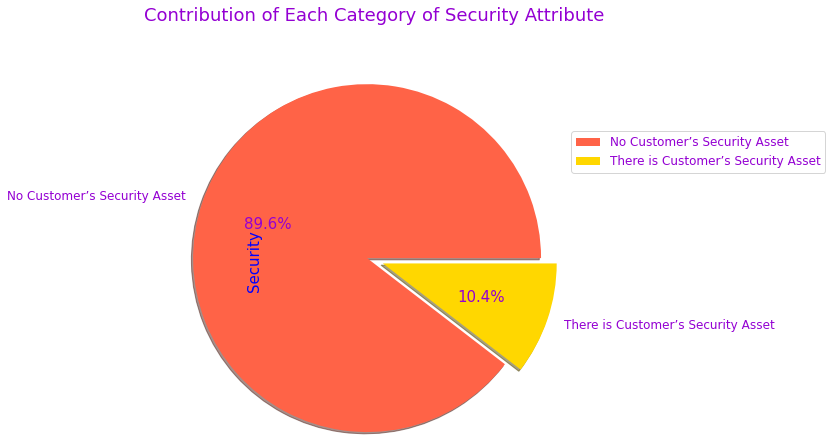

In [66]:
# Plotting Pie Chart to check contribution Security Attribute
colors = ['tomato','gold']
labels = ['No Customer’s Security Asset','There is Customer’s Security Asset']
print('\033[1mPie Chart Showing Contribution of Each Category of Security feature:-')
plt.title('Contribution of Each Category of Security Attribute\n\n\n\n\n\n')
explode = (0.09, 0.1)
bankdata['Security'].value_counts().plot.pie(radius=2,explode=explode,shadow=True,autopct='%1.1f%%',labels=labels,
                                             colors=colors);
plt.legend(loc='right',prop={'size': 12}, bbox_to_anchor=(2.6, 1))
plt.show()

***
**Key Observations:-**
* There is clear domination of presence No Customers Security Asset with 89.6% contribution.
* Customers having Security Assets are having very low contribution with only 10.4%.
***

**Attribute 9: FixedDepositAccount**

Pie Chart Showing Contribution of Each Category of FixedDepositAccount feature:-


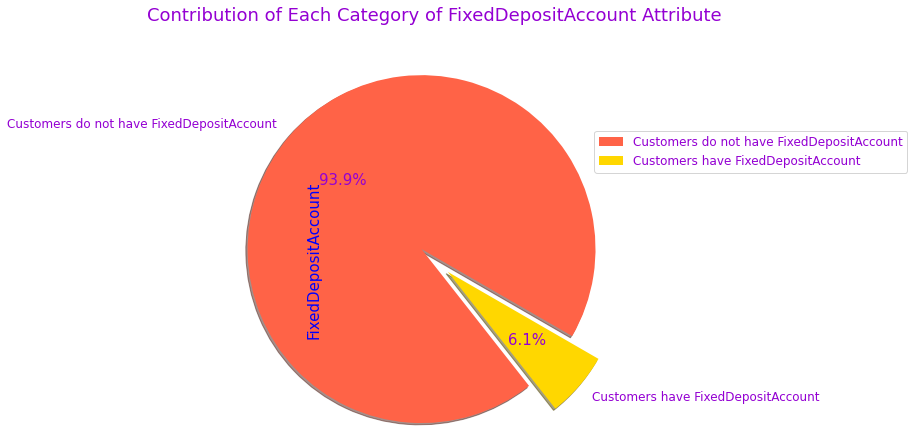

In [67]:
# Plotting Pie Chart to check contribution FixedDepositAccount Attribute
labels = ['Customers do not have FixedDepositAccount','Customers have FixedDepositAccount']
print('\033[1mPie Chart Showing Contribution of Each Category of FixedDepositAccount feature:-')
plt.title('Contribution of Each Category of FixedDepositAccount Attribute\n\n\n\n\n\n')
explode = (0.2, 0.2)
bankdata['FixedDepositAccount'].value_counts().plot.pie(radius=2,explode=explode,shadow=True,autopct='%1.1f%%',startangle=-30,
                                                labels=labels,colors=colors);
plt.legend(loc='right',prop={'size': 12}, bbox_to_anchor=(2.7, 1))
plt.show()

***
**Key Observations:-**
* There is clear domination of Customers do not have FixedDepositAccount with 93.9% contribution. This means very few people had FixedDepositAccount with bank.
* 6.1% Customers have FixedDepositAccount
***

**Attribute 10: InternetBanking**

Pie Chart Showing Contribution of Each Category of InternetBanking feature:-


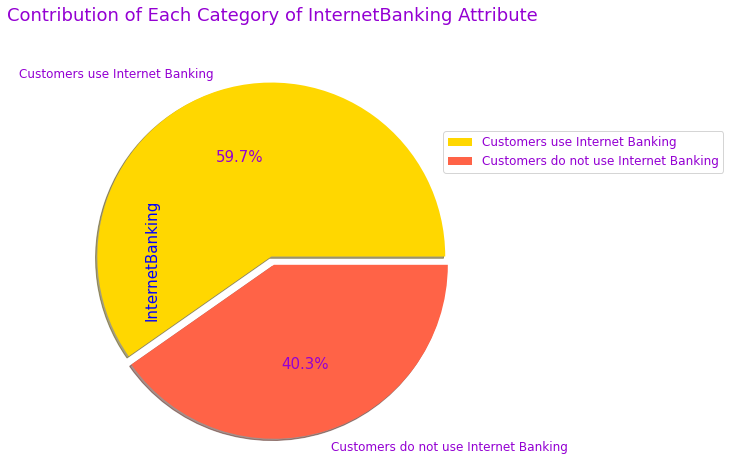

In [68]:
# Plotting Pie Chart to check contribution of InternetBanking Attribute
colors = ['gold','tomato']
labels = ['Customers use Internet Banking','Customers do not use Internet Banking']
print('\033[1mPie Chart Showing Contribution of Each Category of InternetBanking feature:-')
plt.title('Contribution of Each Category of InternetBanking Attribute\n\n\n\n\n\n')
explode = (0.05, 0.05)
bankdata['InternetBanking'].value_counts().plot.pie(radius=2,explode=explode,shadow=True,autopct='%1.1f%%',labels=labels,
                                                    colors=colors);
plt.legend(loc='right',prop={'size': 12}, bbox_to_anchor=(2.6, 1))
plt.show()

***
**Key Observations:-**
* 59.7% of customers are using Internet Banking
* 40.3% of customers do not use Internet Banking.
***

**Attribute 11: CreditCard**

Pie Chart Showing Contribution of Each Category of CreditCard feature:-


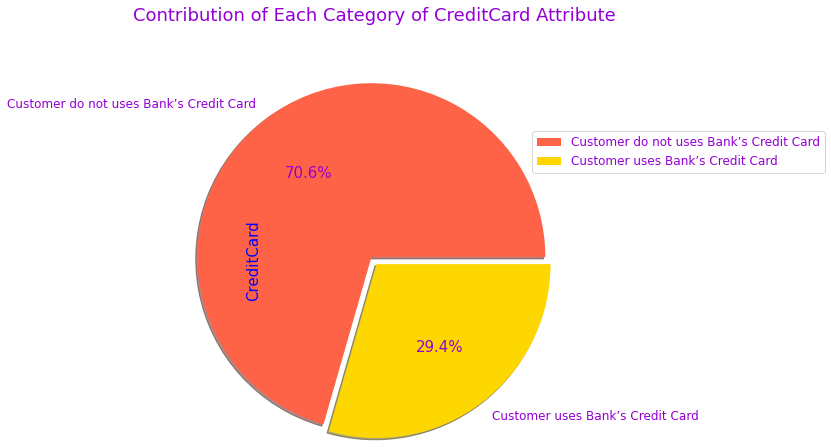

In [69]:
# Plotting Pie Chart to check contribution of CreditCard Attribute
colors = ['tomato','gold']
labels = ['Customer do not uses Bank’s Credit Card','Customer uses Bank’s Credit Card']
print('\033[1mPie Chart Showing Contribution of Each Category of CreditCard feature:-')
plt.title('Contribution of Each Category of CreditCard Attribute\n\n\n\n\n\n')
explode = (0.05, 0.05)
bankdata['CreditCard'].value_counts().plot.pie(radius=2,explode=explode,shadow=True,autopct='%1.1f%%',labels=labels,
                                               colors=colors);
plt.legend(loc='right',prop={'size': 12}, bbox_to_anchor=(2.6, 1))
plt.show()

***
**Key Observations:-**
* Most of customers are not using Credit Cards (70.6% contribution).
* Only 29.4% of customers are using Credit Cards.
***

**Attribute 12: LoanOnCard**

Pie Chart Showing Contribution of Each Category of LoanOnCard feature:-


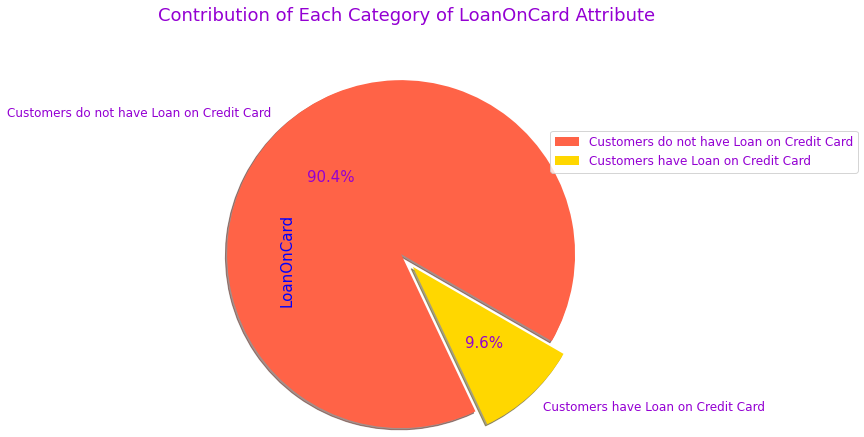

In [70]:
# Plotting Pie Chart to check contribution of LoanOnCard Attribute
labels = ['Customers do not have Loan on Credit Card','Customers have Loan on Credit Card']
print('\033[1mPie Chart Showing Contribution of Each Category of LoanOnCard feature:-')
plt.title('Contribution of Each Category of LoanOnCard Attribute\n\n\n\n\n\n')
explode = (0.1, 0.1)
bankdata['LoanOnCard'].value_counts().plot.pie(radius=2,explode=explode,shadow=True,autopct='%1.1f%%',startangle=-30,
                                               labels=labels, colors=colors);
plt.legend(loc='right',prop={'size': 12}, bbox_to_anchor=(2.6, 1))
plt.show()

***
**Key Observations:-**
* Most of customers has no Loan On Card (90.4% contribution).
* Only 9.6% of customers have Loan On their Credit Card.
***

### Outliers in Each Discrete Attribute

Since Categorical data outliers doesn't give any meaning, we are neglecting them.

In [71]:
# Getting Number of Outliers or Extreme values in attributes
clm = ['Age','CustomerSince','HighestSpend','MonthlyAverageSpend','Mortgage']
AT = []
OL = []
for i in clm:
    AT.append(i)
    q1 = bankdata[i].quantile(0.25)
    q3 = bankdata[i].quantile(0.75)
    IQR = q3 - q1
    OL_ctr=0
    for k in bankdata[i]:
        if (k < (q1 - 1.5 * IQR) or k > (q3 + 1.5 * IQR)):
            OL_ctr+=1
    OL.append(OL_ctr)
print('\033[1mTable Showing Number of Outiers in Attributes:-')
Outlier = pd.DataFrame(AT,columns=['Attribute'])
Outlier['Outliers'] = OL
display(Outlier)

Table Showing Number of Outiers in Attributes:-


Attribute  Outliers
0                  Age         0
1        CustomerSince         0
2         HighestSpend        96
3  MonthlyAverageSpend       324
4             Mortgage       291

***
**Key Observations:-**
* 'MonthlyAverageSpend' has highest number of Outliers.
* 'Age' and 'CustomerSince' have Zero outlier.
***

### <u> Bivariate Analysis</u>
    
* Bivariate Analysis is performed to find the relationship between Quantitative or Continuous Variable and Categorical variable of dataset. 

* To do analysis here we are using Violin plots because Violin plot depicts distributions of numeric data for one or more groups using density curves. The width of each curve corresponds with the approximate frequency of data points in each region.

* Since we have 7 categorical attributes and 5 discrete attributes, we will use subplots for better representation

**Bivariate Analysis 1: Age VS All Categorical Attributes**


Plots Showing Bivariate Analysis of Age VS All Categorical Attributes:-


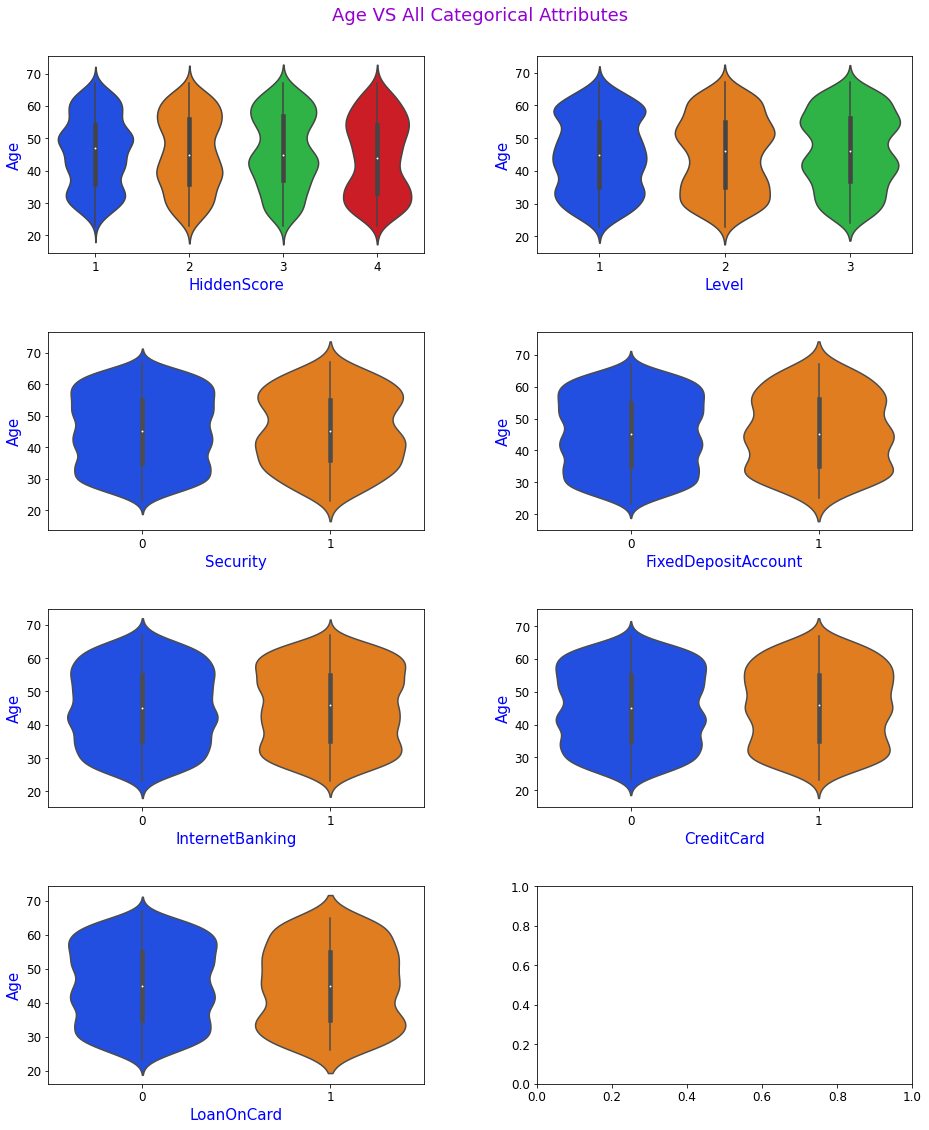

In [72]:
# Bivariate Analysis for Age VS All Categorical Attributes
print('\033[1m\nPlots Showing Bivariate Analysis of Age VS All Categorical Attributes:-')

# Setting up Sub-Plots
fig, axes = plt.subplots(4, 2, figsize=(15, 17))
fig.suptitle('Age VS All Categorical Attributes')
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.94, wspace=0.3, hspace=0.4)

# Plotting Sub-Plots
sns.violinplot(ax=axes[0, 0], x='HiddenScore', y='Age', data=bankdata, palette='bright');
sns.violinplot(ax=axes[0, 1], x='Level', y='Age', data=bankdata, palette='bright');
sns.violinplot(ax=axes[1, 0], x='Security', y='Age', data=bankdata, palette='bright');
sns.violinplot(ax=axes[1, 1], x='FixedDepositAccount', y='Age', data=bankdata, palette='bright');
sns.violinplot(ax=axes[2, 0], x='InternetBanking', y='Age', data=bankdata, palette='bright');
sns.violinplot(ax=axes[2, 1], x='CreditCard', y='Age', data=bankdata, palette='bright');
sns.violinplot(ax=axes[3, 0], x='LoanOnCard', y='Age', data=bankdata, palette='bright');
plt.show()

***
**Key Observations:-**
* For Age 30-60, we can see high densities in all categorical attributes.
* There is no influence of outliers in these plots.
***

**Bivariate Analysis 2: CustomerSince VS All Categorical Attributes**


Plots Showing Bivariate Analysis of CustomerSince VS All Categorical Attributes:-


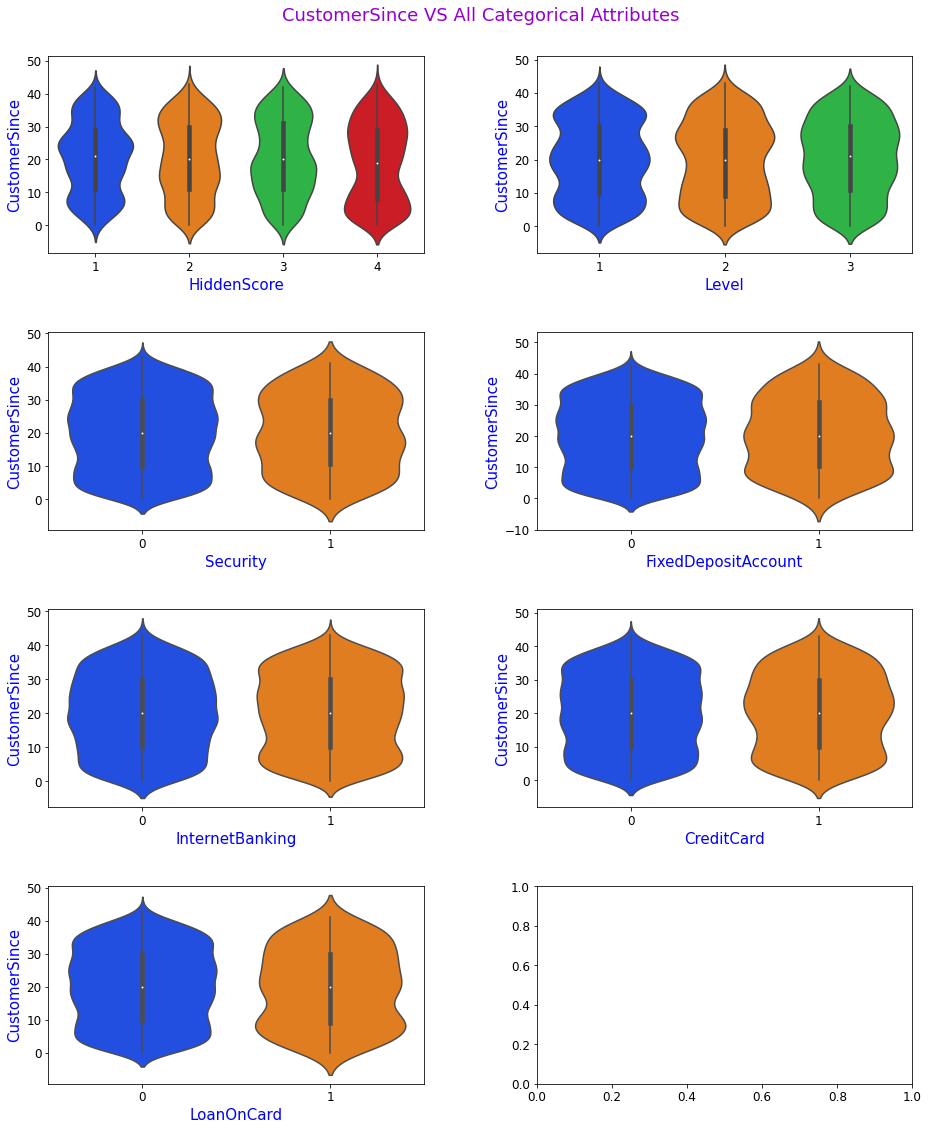

In [73]:
# Bivariate Analysis for CustomerSince VS All Categorical Attributes
print('\033[1m\nPlots Showing Bivariate Analysis of CustomerSince VS All Categorical Attributes:-')

# Setting up Sub-Plots
fig, axes = plt.subplots(4, 2, figsize=(15, 17))
fig.suptitle('CustomerSince VS All Categorical Attributes')
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.94, wspace=0.3, hspace=0.4)

# Plotting Sub-Plots
sns.violinplot(ax=axes[0, 0], x='HiddenScore', y='CustomerSince', data=bankdata, palette='bright');
sns.violinplot(ax=axes[0, 1], x='Level', y='CustomerSince', data=bankdata, palette='bright');
sns.violinplot(ax=axes[1, 0], x='Security', y='CustomerSince', data=bankdata, palette='bright');
sns.violinplot(ax=axes[1, 1], x='FixedDepositAccount', y='CustomerSince', data=bankdata, palette='bright');
sns.violinplot(ax=axes[2, 0], x='InternetBanking', y='CustomerSince', data=bankdata, palette='bright');
sns.violinplot(ax=axes[2, 1], x='CreditCard', y='CustomerSince', data=bankdata, palette='bright');
sns.violinplot(ax=axes[3, 0], x='LoanOnCard', y='CustomerSince', data=bankdata, palette='bright');
plt.show()

***
**Key Observations:-**
* For CustomerSince 5-35, we can see high densities in all categorical features.
* There is no influence of outliers in these plots.
***

**Bivariate Analysis 3: HighestSpend VS All Categorical Attributes**


Plots Showing Bivariate Analysis of HighestSpend VS All Categorical Attributes:-


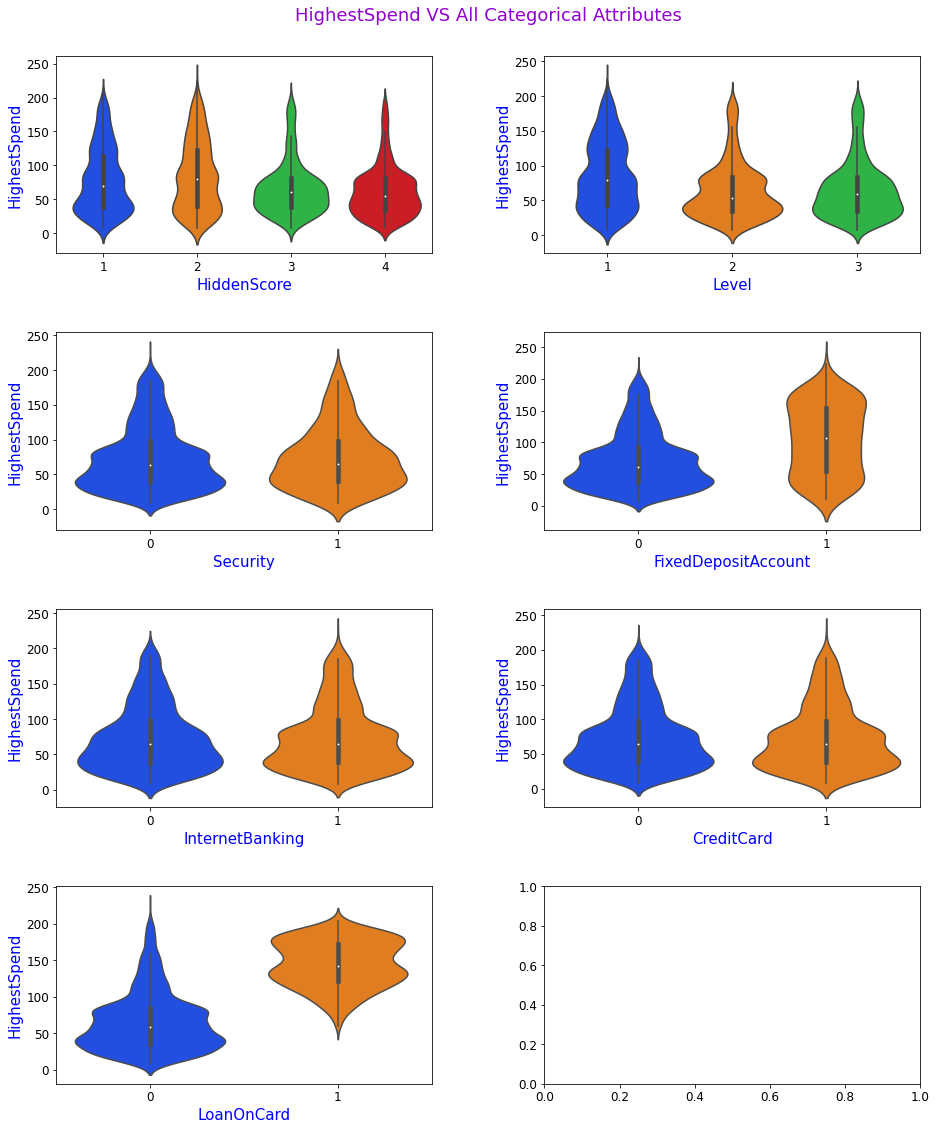

In [74]:
# Bivariate Analysis for HighestSpend VS All Categorical Attributes
print('\033[1m\nPlots Showing Bivariate Analysis of HighestSpend VS All Categorical Attributes:-')

# Setting up Sub-Plots
fig, axes = plt.subplots(4, 2, figsize=(15, 17))
fig.suptitle('HighestSpend VS All Categorical Attributes')
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.94, wspace=0.3, hspace=0.4)

# Plotting Sub-Plots
sns.violinplot(ax=axes[0, 0], x='HiddenScore', y='HighestSpend', data=bankdata, palette='bright');
sns.violinplot(ax=axes[0, 1], x='Level', y='HighestSpend', data=bankdata, palette='bright');
sns.violinplot(ax=axes[1, 0], x='Security', y='HighestSpend', data=bankdata, palette='bright');
sns.violinplot(ax=axes[1, 1], x='FixedDepositAccount', y='HighestSpend', data=bankdata, palette='bright');
sns.violinplot(ax=axes[2, 0], x='InternetBanking', y='HighestSpend', data=bankdata, palette='bright');
sns.violinplot(ax=axes[2, 1], x='CreditCard', y='HighestSpend', data=bankdata, palette='bright');
sns.violinplot(ax=axes[3, 0], x='LoanOnCard', y='HighestSpend', data=bankdata, palette='bright');
plt.show()

***
**Key Observations:-**
* For HighestSpend 25-75, we can see high densities in most of categorical attributes.
* For attribute FixedDepositAccount = 1, densities are high between 25-175 HighestSpend value and for FixedDepositAccount = 0 densities are high between 25-75 HighestSpend value.
* For attribute LoanOnCard = 1, densities are high between 125-175 HighestSpend value and for LoanOnCard = 0 densities are high between 25-75.
* There is influence of outliers in these plots.
* We can observe skewness in the distribution here.
***

**Bivariate Analysis 4: MonthlyAverageSpend VS All Categorical Attributes**


Plots Showing Bivariate Analysis of MonthlyAverageSpend VS All Categorical Attributes:-


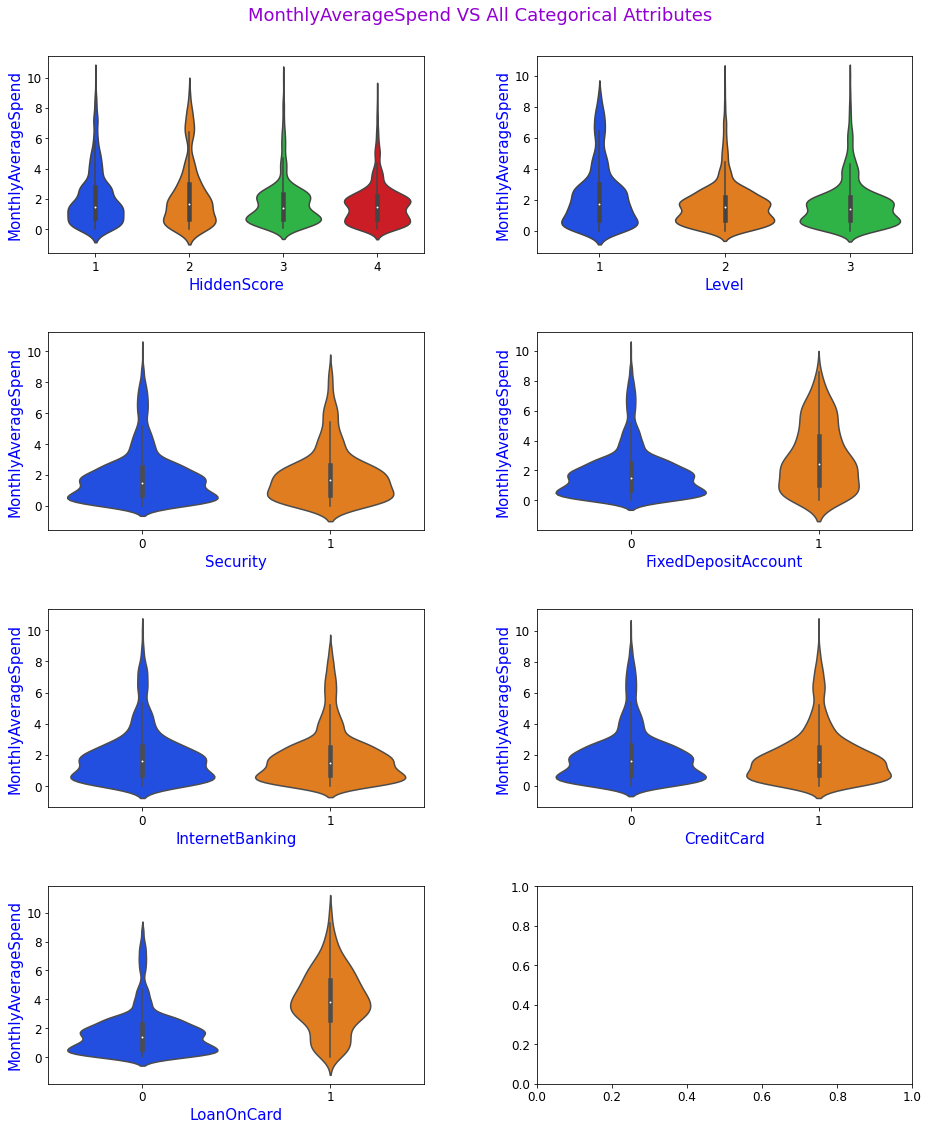

In [75]:
# Bivariate Analysis for MonthlyAverageSpend VS All Categorical Attributes
print('\033[1m\nPlots Showing Bivariate Analysis of MonthlyAverageSpend VS All Categorical Attributes:-')

# Setting up Sub-Plots
fig, axes = plt.subplots(4, 2, figsize=(15, 17))
fig.suptitle('MonthlyAverageSpend VS All Categorical Attributes')
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.94, wspace=0.3, hspace=0.4)

# Plotting Sub-Plots
sns.violinplot(ax=axes[0, 0], x='HiddenScore', y='MonthlyAverageSpend', data=bankdata, palette='bright');
sns.violinplot(ax=axes[0, 1], x='Level', y='MonthlyAverageSpend', data=bankdata, palette='bright');
sns.violinplot(ax=axes[1, 0], x='Security', y='MonthlyAverageSpend', data=bankdata, palette='bright');
sns.violinplot(ax=axes[1, 1], x='FixedDepositAccount', y='MonthlyAverageSpend', data=bankdata, palette='bright');
sns.violinplot(ax=axes[2, 0], x='InternetBanking', y='MonthlyAverageSpend', data=bankdata, palette='bright');
sns.violinplot(ax=axes[2, 1], x='CreditCard', y='MonthlyAverageSpend', data=bankdata, palette='bright');
sns.violinplot(ax=axes[3, 0], x='LoanOnCard', y='MonthlyAverageSpend', data=bankdata, palette='bright');
plt.show()

***
**Key Observations:-**
* For MonthlyAverageSpend 0-3, we can see high densities in most of categorical features..
* For attribute LoanOnCard = 1, densities are high between 2-6 MonthlyAverageSpend value and for LoanOnCard = 0 densities are high between 0-3 MonthlyAverageSpend value.
* There is influence of outliers in these plots.
* We can observe skewness in the distribution here.
***

**Bivariate Analysis 5: Mortgage VS All Categorical Attributes**


Plots Showing Bivariate Analysis of Mortgage VS All Categorical Attributes:-


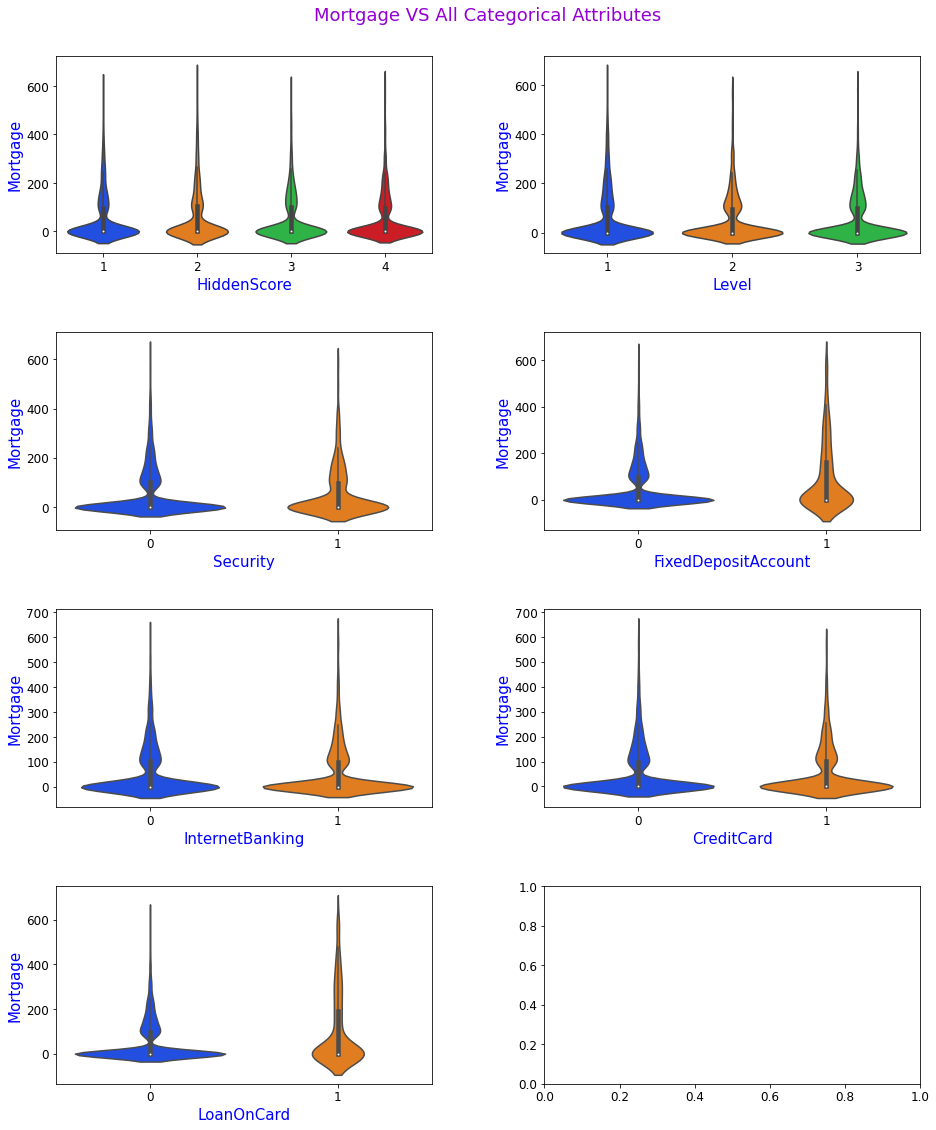

In [76]:
# Bivariate Analysis for Mortgage VS All Categorical Attributes
print('\033[1m\nPlots Showing Bivariate Analysis of Mortgage VS All Categorical Attributes:-')

# Setting up Sub-Plots
fig, axes = plt.subplots(4, 2, figsize=(15, 17))
fig.suptitle('Mortgage VS All Categorical Attributes')
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.94, wspace=0.3, hspace=0.4)

# Plotting Sub-Plots
sns.violinplot(ax=axes[0, 0], x='HiddenScore', y='Mortgage', data=bankdata, palette='bright');
sns.violinplot(ax=axes[0, 1], x='Level', y='Mortgage', data=bankdata, palette='bright');
sns.violinplot(ax=axes[1, 0], x='Security', y='Mortgage', data=bankdata, palette='bright');
sns.violinplot(ax=axes[1, 1], x='FixedDepositAccount', y='Mortgage', data=bankdata, palette='bright');
sns.violinplot(ax=axes[2, 0], x='InternetBanking', y='Mortgage', data=bankdata, palette='bright');
sns.violinplot(ax=axes[2, 1], x='CreditCard', y='Mortgage', data=bankdata, palette='bright');
sns.violinplot(ax=axes[3, 0], x='LoanOnCard', y='Mortgage', data=bankdata, palette='bright');
plt.show()

***
**Key Observations:-**
* For Mortgage 0, we can see high densities in all of categorical features.
* There is high influence of outliers in these plots.
* We can observe high skewness in the distribution here.
***

### <u> Multivariate Analysis</u>
    
 Multivariate analysis is performed to understand interactions between different fields in the dataset.
    
#### Multivariate Analysis : To Check Relation Between Discrete Attributes

Plot Showing Multivariate Analysis to check Relation between Discrete Attributes:-


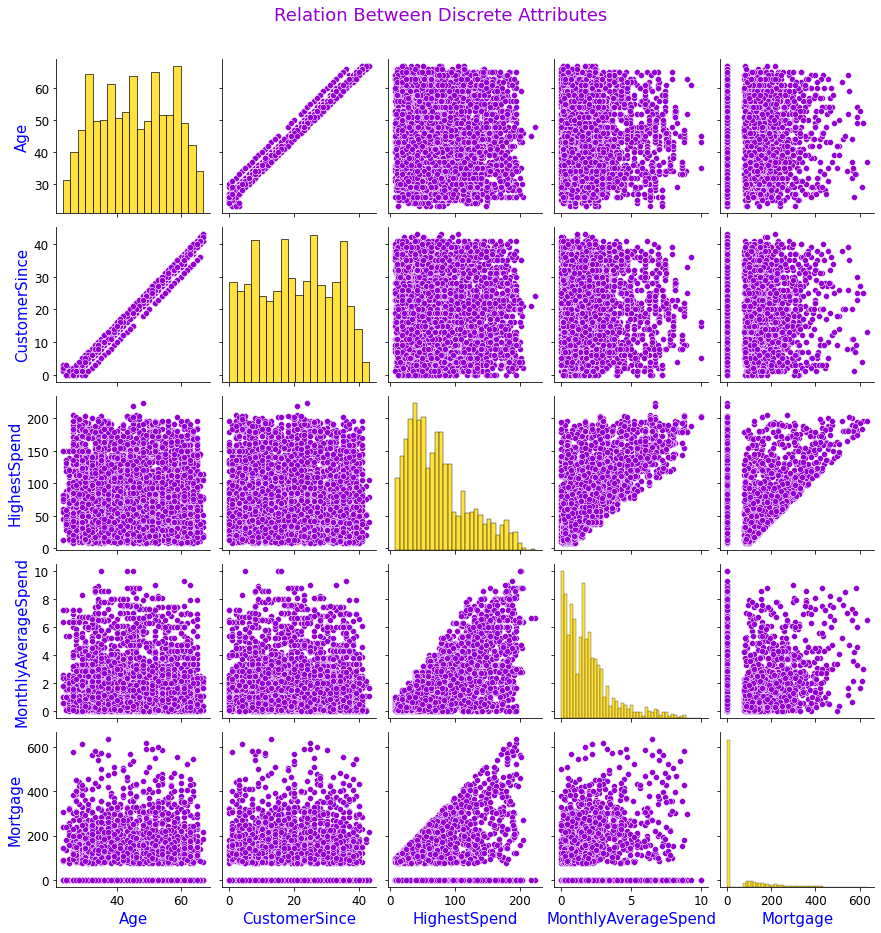

In [77]:
# Multivariate Analysis of Attributes
print('\033[1mPlot Showing Multivariate Analysis to check Relation between Discrete Attributes:-')

# Getting Discrete Attributes and creating dataframe of it
dis_att = bankdata[['Age','CustomerSince','HighestSpend','MonthlyAverageSpend','Mortgage']]

# Plotting pairplot for Discrete Attributes
sns.pairplot(dis_att,plot_kws={'color':'#9400D3'},diag_kws={'color':'Gold'}).fig.suptitle(
    'Relation Between Discrete Attributes',y=1.04);
plt.show()

***
**Key Observations:-**
* We can clearly observe Positive Linear Relation between Age and CustomerSince features.
* Except CustomerSince, Age attributed has no particular relation with any attributes and vice-versa.
***

#### Multivariate Analysis : To check Density of Target Attribute in all other Discrete Features

Plot Showing Multivariate Analysis to check Density of Target Attribute in all other Attributes:-


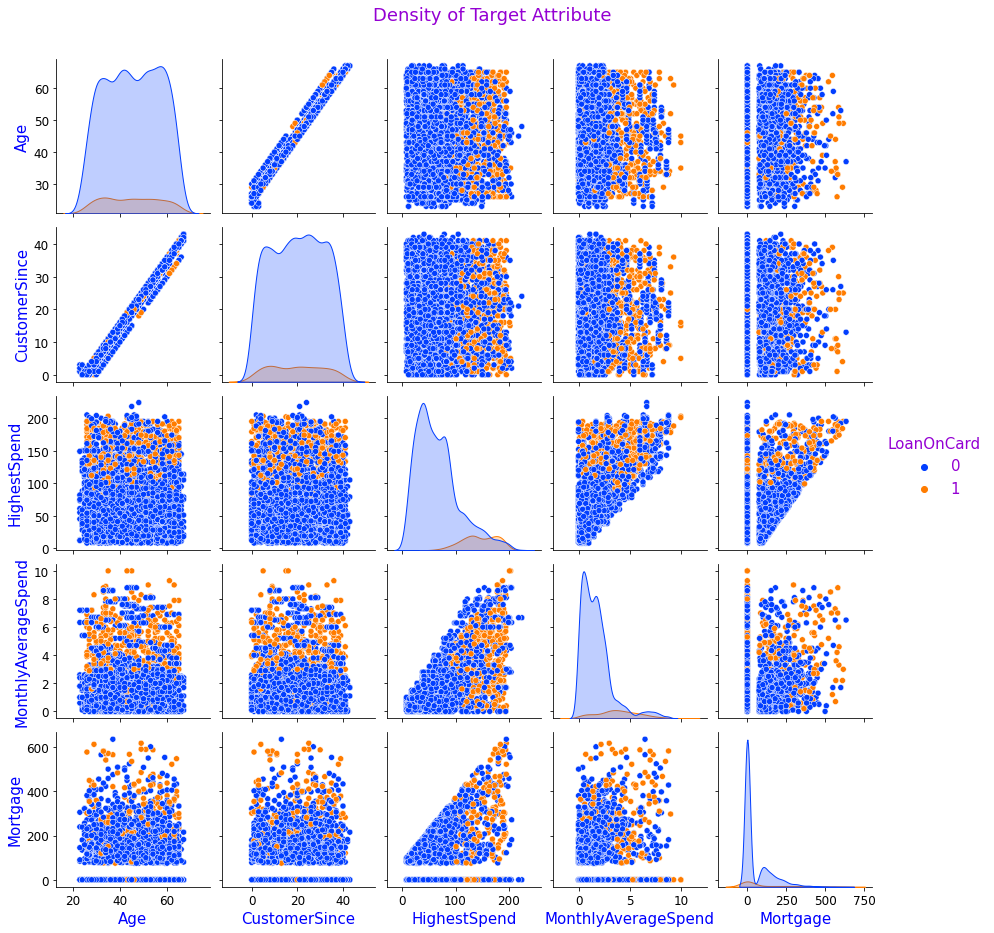

In [78]:
# Multivariate Analysis to check density of Target Attribute in all other Attributes
print('\033[1mPlot Showing Multivariate Analysis to check Density of Target Attribute in all other Attributes:-')

# Adding Target column in dis_att dataframe
dis_att['LoanOnCard'] = bankdata['LoanOnCard']

# Plotting Pair plot for Discrete features with Target attribute
sns.pairplot(dis_att, hue='LoanOnCard', palette='bright').fig.suptitle('Density of Target Attribute',y=1.04);
plt.show()

***
**Key Observations:-**
* By observing above plots its clear that LoanOnCard 0 is dominating.
* We can see traces of LoanOnCard 1 here.
***

#### Multivariate Analysis : To Check Correlation

Heatmap showing Correlation of Data attributes:-


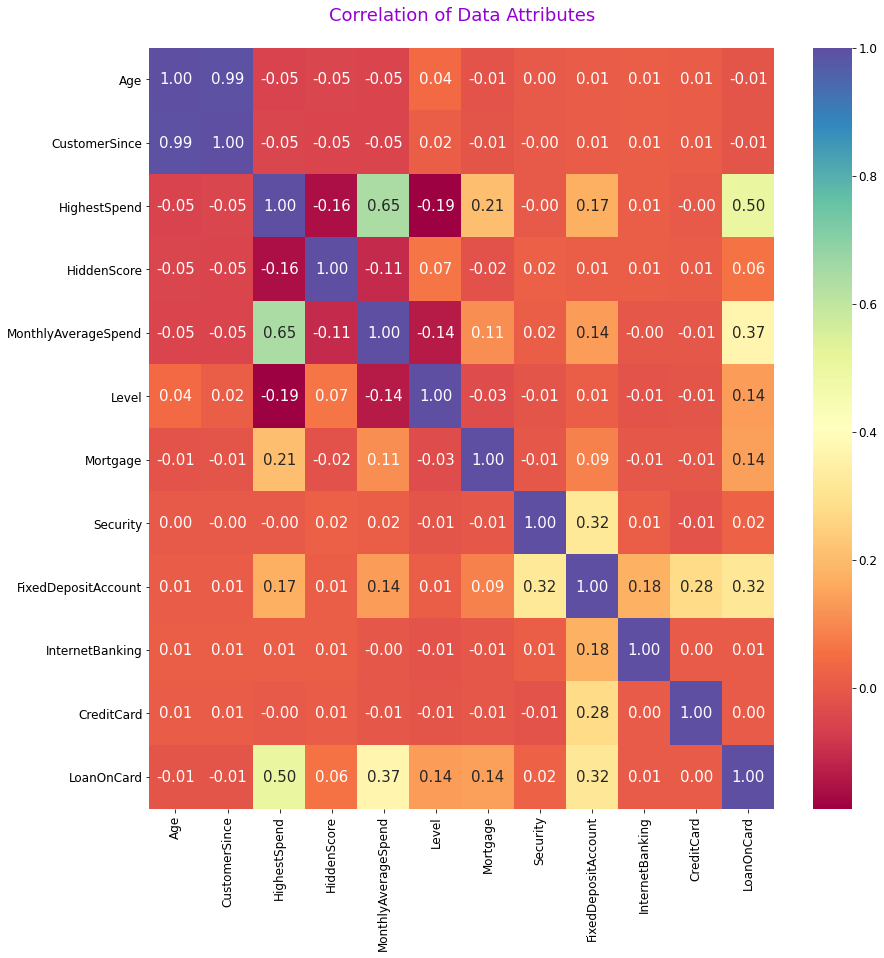

In [79]:
# Plotting Heatmap for checking Correlation
print('\033[1mHeatmap showing Correlation of Data attributes:-')
plt.figure(figsize=(14,14))
plt.title('Correlation of Data Attributes\n')
sns.heatmap(bankdata.corr(),annot=True,fmt= '.2f',cmap='Spectral');
plt.show()

***
**Key Observations:-**
* Most of features have very low correlation between them.
* Security, InternetBanking and CreditCard features are showing least correlation for almost all attributes.
* Correlation table showing 50% positive correlation betwween LoanOnCard and HighestSpend.
* 'Age' and 'CustomerSince' has highest positive correlation 0f 0.99.
* Also 'HighestSpend' and 'MonthlyAverageSpend' are highly positively correlated.
***

## <span style="color:#9400D3">4. Data Pre-Processing:

### Outlier Analysis

* Outlier Analysis is a process that involves identifying the anomalous observation in the dataset.”
* An outlier is an observation that lies an abnormal distance from other values in the attribute of dataset.
* Since we have few outliers or extreme values, we will replace them by their respective mean of attribute.
* Since outliers in Categorical features doesn't give any meaning, we are neglecting them.
* Hence this analysis is only for Discrete Features.

NOTE:- Here we are Replacing Outliers by Mean of the Attribute without outliers. That is we will calculate Mean without outliers and then replace outliers with this calculated Mean

In [80]:
# Getting Outliers and Imputing Outliers by Mean

# Creating list of Discrete Feature column with additional empty lists that are required
clm = ['Age','CustomerSince','HighestSpend','MonthlyAverageSpend','Mortgage']
AT = []
OL1 = []
OL2 = []
M1 = []
M2 = []
for i in clm:
    AT.append(i)
        
    # Getting Interquartile Range
    q1 = bankdata[i].quantile(0.25)
    q3 = bankdata[i].quantile(0.75)
    IQR = q3 - q1
        
    # Getting Mean of each Attribute having Outliers (i.e including outliers)
    M1.append(round(bankdata[i].mean(),2)) 
        
    # Getting Outlier and Normal Values Seperated
    OL = []
    NOL = []
    for k in bankdata[i]:
        if (k < (q1 - 1.5 * IQR) or k > (q3 + 1.5 * IQR)):
            OL.append(k)
        else:
            NOL.append(k)
    OL1.append(len(OL))
        
    # Replacing Outliers by Mean of Normal Values
    bankdata[i].replace(OL,np.mean(NOL),inplace=True) # Here we are imputing outliers by Mean of attribute without outlier
    M2.append(round(np.mean(NOL),2))
        
    # Getting Outliers After Imputation
    OL_cnt = 0
    for k in bankdata[i]:
        if (k < (q1 - 1.5 * IQR) or k > (q3 + 1.5 * IQR)):
            OL_cnt += 1
    OL2.append(OL_cnt)
        
# Creting dataframe for better representation of Outlier Analysis      
Outlier_Analysis = pd.DataFrame({'Attribute':AT,
                                 'Mean Including Outliers':M1,
                                 'Outliers Before Imputation':OL1,
                                 'Mean Excluding Outliers':M2,
                                 'Outliers After Imputation':OL2})
print('\033[1mTotal Outliers Observed in Discrete Attributes =',sum(OL1))
print('\n\033[1mTable Showing Outlier Analysis:-')
display(Outlier_Analysis)  

Total Outliers Observed in Discrete Attributes = 711

Table Showing Outlier Analysis:-


Attribute  Mean Including Outliers  Outliers Before Imputation  \
0                  Age                    45.35                           0   
1        CustomerSince                    20.15                           0   
2         HighestSpend                    73.85                          96   
3  MonthlyAverageSpend                     1.94                         324   
4             Mortgage                    56.59                         291   

   Mean Excluding Outliers  Outliers After Imputation  
0                    45.35                          0  
1                    20.15                          0  
2                    71.48                          0  
3                     1.60                          0  
4                    38.03                          0

***
**Key Observations:-**
* Mean of Age and Customer remains unchanged, since there are no outliers for both features.
* All outliers are replaced by "Mean Excluding Outliers". 
* Since Mortgage feature has high influence of outliers, we can see large change in mean values.
***

### Feature Scaling Standardization(Z-Score Normalization)

Scaling is needed for our data, we will scale all discrete features with Z-Score Normalization.
By Standardizing the values of dataset, we get the following statistics of the data distribution,
* Mean = 0
* Standard Deviation = 1

In [81]:
# Creating list of Discrete Feature column 
clm = ['Age','CustomerSince','HighestSpend','MonthlyAverageSpend','Mortgage']

# Applying Z-Scores to Discrete features
bankdata[clm] = bankdata[clm].apply(zscore)

# Checking the Mean and Standard Deviation
print('\033[1mTable Showing Mean and Standard Deviation of Scaled Discrete Attributes:-')
display(bankdata[['Age','CustomerSince','HighestSpend','MonthlyAverageSpend','Mortgage']].describe()[1:3].T)

Table Showing Mean and Standard Deviation of Scaled Discrete Attributes:-


mean     std
Age                 -1.581065e-16  1.0001
CustomerSince        1.465138e-16  1.0001
HighestSpend         2.225239e-16  1.0001
MonthlyAverageSpend  2.918237e-17  1.0001
Mortgage            -2.358667e-16  1.0001

***
**Key Observations:-**
* The Mean values are approaching Zero.
* Standard Deviation is approaching One.
* Hecnce we have scaled Discrete features to corresponding Z-Score.
***

### <span style="color:#9400D3"> * Segregate Predictors VS Target Attributes
  By sperating Predictors and Target attributes, we can perform further operations easily.

In [82]:
# Seperating Independent and Dependent Attributes

# Getting Predictors by dropping Class Attribute
X = bankdata.drop(columns='LoanOnCard')

# Getting Target Attribute
y = bankdata['LoanOnCard'] 

print('\033[1mTable Showing Segregated Predictors:-')
display(X.head())

Table Showing Segregated Predictors:-


Age  CustomerSince  HighestSpend  HiddenScore  MonthlyAverageSpend  \
9  -0.990365      -0.976533      2.533781            1             0.000000   
10  1.713974       1.651526      0.782680            4             0.696823   
11 -1.426548      -1.326941     -0.618201            3            -1.301976   
12  0.230950       0.249894      0.992812            2             1.913483   
13  1.190554       1.038312     -0.734941            4             0.783727   

    Level  Mortgage  Security  FixedDepositAccount  InternetBanking  \
9       3 -0.575286         0                    0                0   
10      3 -0.575286         0                    0                0   
11      2 -0.575286         0                    0                1   
12      3 -0.575286         1                    0                0   
13      2 -0.575286         0                    0                1   

    CreditCard  
9            0  
10           0  
11           0  
12           0  
13           0

***
**Key Observations:-**
* We have Segregated Predictors and Target Attributes and assigned them to X and y respectively
***

### <span style="color:#9400D3"> * Check for Target Balancing and Fix it if found Imbalanced.
* When observation in one class is higher than the observation in other classes then there exists a class imbalance.
* If imbalance of Target attribute is high, then model would be more bias towards higher observation class.

Table Showing Total Observations in each section:-


Total Observations
0                4500
1                 480



Pie Chart Showing Percentage of Each Category of Target Attribute:-


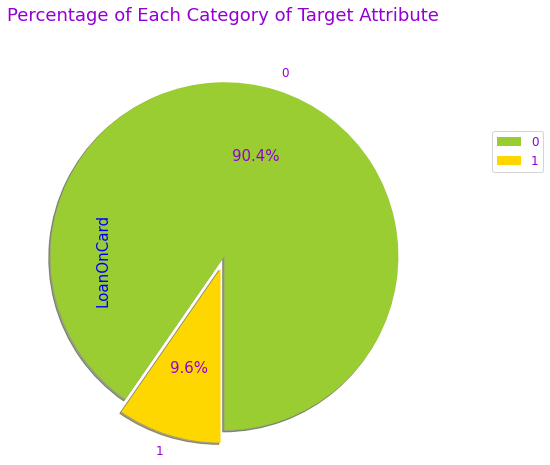

In [83]:
# Checking Value Counts of Target Attribute
print('\033[1mTable Showing Total Observations in each section:-')
TAC = y.value_counts().to_frame('Total Observations')
display(TAC)

# Getting Percentages of each category in Target Attribute

print('\033[1m\n\nPie Chart Showing Percentage of Each Category of Target Attribute:-')
plt.title('Percentage of Each Category of Target Attribute\n\n\n\n\n\n')
explode = (0.05, 0.1)
y.value_counts().plot.pie(radius=2,explode=explode,shadow=True,autopct='%1.1f%%',startangle=-90,colors=['yellowgreen','gold']);
plt.legend(loc='right',prop={'size': 12}, bbox_to_anchor=(2, 1))
plt.show()

***
**Key Observations:-**
* Target Attribute found Imbalanced.
* Class 0 is dominating by 90.4% of data.
* Class 1 covers only 9.6% of data.
***

### Fixing Target Imbalance by Synthetic Minority Oversampling Technique (SMOTE)

   SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

Table Showing Total Observations in each section of target data for SMOTE:-


__________Total Observations__________                    
                        Before Tranformation After Tranformation
0                                       4500                4500
1                                        480                4500
Total                                   4980                9000



Pie Chart Showing Percentage of Each Category of Target Attribute:-


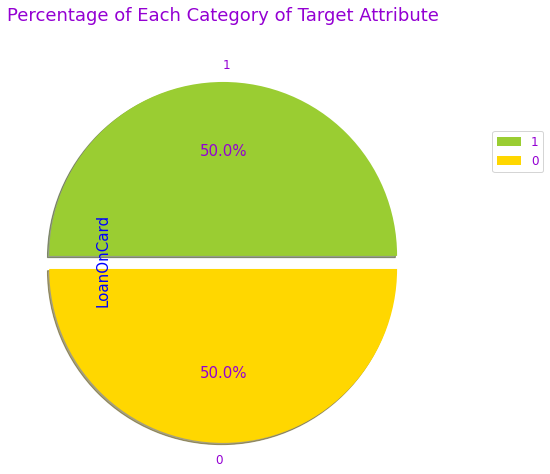

In [84]:
# Getting total observations of target attribute before transformation
yct = y.count()

# Transforming the dataset
OS = SMOTE(random_state=1)
X, y = OS.fit_resample(X, y)

# Checking Value Counts of Target Attribute after transforming
print('\033[1mTable Showing Total Observations in each section of target data for SMOTE:-') 
TAC2 = y.value_counts().to_frame('Total Observations')

# For better representation
TVC = pd.DataFrame({'Before Tranformation':TAC['Total Observations'],'After Tranformation':TAC2['Total Observations']})
total  = pd.Series({'Before Tranformation':yct,'After Tranformation':y.count()},name='Total')
TVC = TVC.append(total)
columns=[('__________Total Observations__________', 'Before Tranformation'), ('__________Total Observations__________', 
                                                                              'After Tranformation')]
TVC.columns = pd.MultiIndex.from_tuples(columns)

display(TVC)

# Getting Percentages of each category in Target Attribute

print('\033[1m\n\nPie Chart Showing Percentage of Each Category of Target Attribute:-')
plt.title('Percentage of Each Category of Target Attribute\n\n\n\n\n\n')
explode = (0.05, 0.1)
y.value_counts().plot.pie(radius=2,explode=explode,shadow=True,autopct='%1.1f%%',colors=['yellowgreen','gold']);
plt.legend(loc='right',prop={'size': 12}, bbox_to_anchor=(2, 1))
plt.show()

***
**Key Observations:-**
* Target Imbalance has fixed using SMOTE.
* We can observe that 4020 new observation has been added to our data. (9000 - 4980)
* Now Target variable has equal observations for both sections(0 & 1).
***

### <span style="color:#9400D3"> * Perform Train-Test Split.
 * The procedure involves taking a dataset and dividing it into two subsets.
 * The first subset is used to fit the model and is referred to as the training dataset. 
 * The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.
 * Here we keep 75:25 ratio i.e. 75% of data as Training set and 25% as Testing set.

In [85]:
# Splitting into Train and Test Sets in 

# Here test_size is not given because by default its value is 0.25.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

# For better observation of Splitted Data
TTS = pd.DataFrame({'Train':y_train.value_counts(),'Test':y_test.value_counts(),'Total Observations':y.value_counts()})
total  = pd.Series({'Train':y_train.count(),'Test':y_test.count(),'Total Observations':y.shape[0]},name='Total')
TTS = TTS.append(total)
print('\033[1mTable Showing Train-Test Split of Data:-')
display(TTS)

Table Showing Train-Test Split of Data:-


Train  Test  Total Observations
1       3375  1125                4500
0       3375  1125                4500
Total   6750  2250                9000

***
**Key Observations:-**
* We have Splitted data in 75:25 Ratio.
* Training data has 6750 and Testing data has 2250 observations.
***

## <span style="color:#9400D3">5. Model Training, Testing and Tuning:

### <span style="color:#9400D3"> * Design and Train a Logistic Regression and Naive Bayes Classifiers.

### Logistic Regression

In [86]:
# Building Logistic Regression Model
LR = LogisticRegression(solver="liblinear")

# Fitting Logistic Regression Model on Train
LR.fit(X_train, y_train)

# Predicting on the Train and Test set
LR_Prediction_Train = LR.predict(X_train)
LR_Prediction_Test = LR.predict(X_test)

### Naive Bayes Classifiers : Gaussian

In [87]:
# Building Gaussian Naive Bayes Model
NB = GaussianNB()

# Fitting Gaussian Naive Bayes Model on Train
NB.fit(X_train, y_train)

# Predicting on the Train and Test set
NB_Prediction_Train = NB.predict(X_train)
NB_Prediction_Test = NB.predict(X_test)

***
**Key Observations:-**
* Logistic Regression and Gaussian Naive Bayes Models are designed and trained.
***

### <span style="color:#9400D3"> * Display the Classification Accuracies for Train and Test Data.
* Accuracy is the number of correct predictions made by the model by the total number of records.

In [88]:
# Finding Logistic Regression Model Accuracies for Train and Test
Train_LRAC = round(metrics.accuracy_score(y_train,LR_Prediction_Train)*100,2)
Test_LRAC = round(metrics.accuracy_score(y_test,LR_Prediction_Test)*100,2)

# Displaying Logistic Regression Model Accuracies for Train and Test Data
print('\033[1mTable Showing Logistic Regression Model Accuracies for Train and Test Data:-')
display(pd.DataFrame({'Data':['Training','Testing'],'LR Accuracy (%)':[Train_LRAC,Test_LRAC]}).set_index('Data'))

# Finding Gaussian Naive Bayes Model Accuracies for Train and Test
Train_NBAC = round(metrics.accuracy_score(y_train,NB_Prediction_Train)*100,2)
Test_NBAC = round(metrics.accuracy_score(y_test,NB_Prediction_Test)*100,2)

# Displaying Gaussian Naive Bayes Model Accuracies for Train and Test Data
print('\033[1m\n\nTable Showing Gaussian Naive Bayes Model Accuracies for Train and Test Data:-')
display(pd.DataFrame({'Data':['Training','Testing'],'NB Accuracy (%)':[Train_NBAC,Test_NBAC]}).set_index('Data'))

Table Showing Logistic Regression Model Accuracies for Train and Test Data:-


LR Accuracy (%)
Data                     
Training            88.03
Testing             87.96



Table Showing Gaussian Naive Bayes Model Accuracies for Train and Test Data:-


NB Accuracy (%)
Data                     
Training            86.71
Testing             86.27

***
**Key Observations:-**
* In Both Models, we are getting train and test accuracies pretty much same, which is good and well balanced.
* Since Train accuracy is little high, there is slightly overfitting of trained data.
***

### <span style="color:#9400D3"> * Display and Explain the Classification Report in detail.
  * A Classification Report is used to measure the quality of predictions from a classification algorithm.
  * Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.
  * Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.
  * The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
  * Support is the number of actual occurrences of the class in the specified dataset.

In [89]:
# Getting Classification Report for Logistic Regression Model
LRCR = metrics.classification_report(y_test,LR_Prediction_Test,output_dict=True)

# Displaying Logistic Regression Model Classification Report
print('\033[1mTable Showing Logistic Regression Model Classification Report:-')
display(pd.DataFrame(LRCR))

# Getting Classification Report for Naive Bayes Model 
NBCR = metrics.classification_report(y_test,NB_Prediction_Test,output_dict=True)

# Displaying Naive Bayes Model Classification Report
print('\033[1m\n\nTable Showing Naive Bayes Model Classification Report:-')
display(pd.DataFrame(NBCR))

Table Showing Logistic Regression Model Classification Report:-


0            1  accuracy    macro avg  weighted avg
precision     0.875220     0.883993  0.879556     0.879606      0.879606
recall        0.885333     0.873778  0.879556     0.879556      0.879556
f1-score      0.880247     0.878856  0.879556     0.879552      0.879552
support    1125.000000  1125.000000  0.879556  2250.000000   2250.000000



Table Showing Naive Bayes Model Classification Report:-


0            1  accuracy    macro avg  weighted avg
precision     0.857895     0.867568  0.862667     0.862731      0.862731
recall        0.869333     0.856000  0.862667     0.862667      0.862667
f1-score      0.863576     0.861745  0.862667     0.862661      0.862661
support    1125.000000  1125.000000  0.862667  2250.000000   2250.000000

***
**Key Observations:-**
* In Both Models, we are getting precision, recall and f1-scores are good and well balanced.
* For precision of class 0 is little less than class 1.
* Recall and F1-scores of class 0 are pretty high than class 1
* Precision, recall and f1-score are almost same for accuracies and averages.
***

### Evaluating Performance of Logistic Regression and Naive Bayes Models

 Heatmap Showing Performance of Logistic Regression Model:-


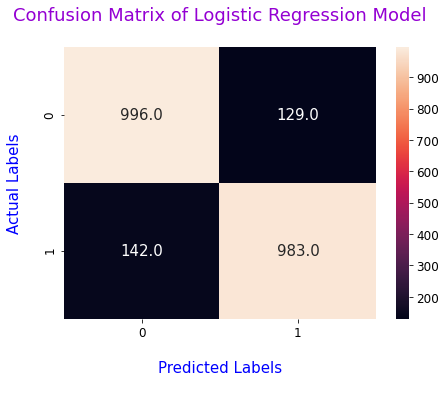


 Heatmap Showing Performance of Naive Bayes Model:-


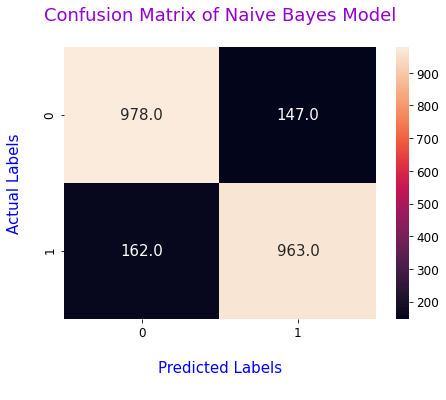

In [90]:
# Building Confusion Matrix for Logistic Regression Model
CM1 = metrics.confusion_matrix(y_test, LR_Prediction_Test)
Con_Mat1 = pd.DataFrame(CM1)

# Displaying Confusion Matrix for Logistic Regression Model
print('\033[1m Heatmap Showing Performance of Logistic Regression Model:-')
plt.figure(figsize = (7,5))
sns.heatmap(Con_Mat1, annot=True, fmt=".1f")
plt.title('Confusion Matrix of Logistic Regression Model\n')
plt.xlabel('\nPredicted Labels\n')
plt.ylabel('Actual Labels\n')
plt.show()

# Building Confusion Matrix for Naive Bayes Model
CM2 = metrics.confusion_matrix(y_test, NB_Prediction_Test)
Con_Mat2 = pd.DataFrame(CM2)

# Displaying Confusion Matrix for Naive Bayes Model
print('\033[1m\n Heatmap Showing Performance of Naive Bayes Model:-')
plt.figure(figsize = (7,5))
sns.heatmap(Con_Mat2, annot=True, fmt=".1f")
plt.title('Confusion Matrix of Naive Bayes Model\n')
plt.xlabel('\nPredicted Labels\n')
plt.ylabel('Actual Labels\n')
plt.show()

***
**Key Observations:-**
* When we compare prediction rate of both the models, Logistic Regression performing better prediction than Naive Bayes Model.
***

### <span style="color:#9400D3"> * Apply all the possible Tuning Techniques to Train the best Model for the given data. Select the final best Trained Model with your comments for selecting this Model.
    
* Here we first create a list of Models.
* Then we will find Accuracies and Error Rates of each Model using Cross Validation Scores (evaluating estimator performance).

**List of different Models Applied to our Data:-**
   1. LogisticRegression()
   2. KNeighborsClassifier()
   3. GaussianNB()
   4. SVC(kernel='rbf')
   5. SVC(kernel='linear')
   6. RandomForestClassifier()
   7. DecisionTreeClassifier()

In [91]:
# Creating List of Models
Models = [LogisticRegression(), KNeighborsClassifier(metric='euclidean'), GaussianNB(), SVC(gamma='auto'),
          SVC(kernel='linear',gamma='auto'), RandomForestClassifier(), DecisionTreeClassifier()]

# Getting Accuracies and Error Rates from Models
Model_Accuracy = []
Model_Error = []
for i in Models:
    Model_Accuracy.append(round(cross_val_score(i,X,y,scoring='accuracy',cv=5).mean(),3)*100)
    Model_Error.append(round(1-cross_val_score(i,X,y,scoring='accuracy',cv=5).mean(),3)*100)
    
# Displaying Accuracies and Error Rates from Models
print('\033[1mTable Showing Accuracies and Error Rates from Varius Algorithms:-')
model = ['Logistic Regression','K-Neighbors Classifier','Gaussian Naive Bayes','RBF Support Vector Classifier',
        'Linear Support Vector Classifier','Random Forest Classifier','Decision Tree Classifier']
display(pd.DataFrame({'Trained Model':model,'Accuracy (%)':Model_Accuracy,'Error Rate (%)':Model_Error}))

Table Showing Accuracies and Error Rates from Varius Algorithms:-


Trained Model  Accuracy (%)  Error Rate (%)
0               Logistic Regression          87.9            12.1
1            K-Neighbors Classifier          96.4             3.6
2              Gaussian Naive Bayes          86.6            13.4
3     RBF Support Vector Classifier          94.5             5.5
4  Linear Support Vector Classifier          88.1            11.9
5          Random Forest Classifier          98.7             1.3
6          Decision Tree Classifier          97.3             2.6

***
**Key Observations:-**
* Here we have applied 7 diffrent models to our dataset.
* By observing above table we cay say, Random Forest Classifier	is showing better Performance for our Dataset. 
* Since Random Forest Classifier has high Accuracy and low Error Rate, we choose **Random Forest Classifier** as our final best Trained Model
***

## <span style="color:#9400D3">6. Conclusion and Improvisation:

### <span style="color:#9400D3"> * Write your Conclusion on the Results.
* According to the objective, we selected our Target Variable and based on this we build our models.
* In given data we found some outliers which we have replaced by means.
* Due to high imbalance their was a risk of biasing of the model. And as a solution to it we over-sampled our data.
* All Discrete features were normalised before applying them to models.
* We got pretty good Accuracies in our models, with balanced precision, recall and f1-score.
* We found Logistic Regression model predicted better than Naive Bayes Model.
* Based on prediction accuracy we choose Random Forest Classifier as best model, since its accuracy is high.

### <span style="color:#9400D3"> * Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the research team to perform a better data analysis in future.

* There was a imbalance in target variable, which is fixed using SMOTE.
* We Found Errors in Recording Observations (Negative Values) in CustomerSince Attribute, which should not happen. We resolved it by converting them to positives.
* We found very few customers who are using Credit Cards. The bank should focus on this parameter.
* Age group of 30-60 range are contributing more, when compared to others. If Bank concentrates on other age groups, we get more data so that our model performance will improve.
* Since Random Forest Classifier has high Accuracy and low Error Rate, we choose Random Forest Classifier as our final best Trained Model

**Closing Sentence:- The Predictions made by our models will help the Bank X in predicting the potential customers who will
convert using the historical dataset.**

### <span style="color:#9400D3">------------------------------------------------- End of Part TWO -----------------------------------------------------

# <span style="color:#9400D3">--------------------- End of AIML MODULE PROJECT 2 ---------------------
  
------------------------------------------------------------------------------**THANK YOU😊**----------------------------------------------------------------------------------
    
***
***